<img src='https://sundeeppothula1993.github.io/ARTML//assets/img/Stocks.png'>


# Peyman Hashemi
# 400131032

In this project we are going to predict the stock of some companies. We are going to use the data that is provided in Dataset folder and for each part the question is explaned before the code.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from persiantools.jdatetime import JalaliDate

Adding data to the notebook

In [400]:
#loading iran_china_clay dataset (ایران چین کلی)
iran_china_clay = pd.read_csv('./Dataset/Iran.China.Clay.csv')
#loading iran_khodro dataset (ایران خودرو)
iran_khodro = pd.read_csv('./Dataset/Iran.Khodro.csv')
#loading iran_metal_industries dataset (ایران معادن و صنایع فلزی)
s_mobarakeh_steel = pd.read_csv('./Dataset/S_Mobarakeh.Steel.csv')
#loading iran_metal_industries dataset (ایران معادن و صنایع فلزی)
social_sec_inv = pd.read_csv('./Dataset/Social.Sec.Inv.csv')
#loading iran_metal_industries dataset (ایران معادن و صنایع فلزی)
tose_atlas_mofid = pd.read_csv('./Dataset/ToseAtlasMofid.ETF.csv')
#loading iran_metal_industries dataset (ایران معادن و صنایع فلزی)
total_indices = pd.read_csv('./Dataset/Total_indices.csv')
stock_names= ['Iran.China.Clay','Iran.Khodro','S.Mobarakeh.Steel','Social.Sec.Inv','ToseAtlasMofid.ETF']


Displaying data

In [401]:
tose_atlas_mofid

<TICKER>  <DTYYYYMMDD>   <FIRST>    <HIGH>     <LOW>  \
0     ToseAtlasMofid.ETF      20230201  308066.0  308800.0  302005.0   
1     ToseAtlasMofid.ETF      20230131  303002.0  308372.0  301505.0   
2     ToseAtlasMofid.ETF      20230130  298200.0  303998.0  294501.0   
3     ToseAtlasMofid.ETF      20230129  307990.0  307990.0  293002.0   
4     ToseAtlasMofid.ETF      20230128  314950.0  314950.0  305002.0   
...                  ...           ...       ...       ...       ...   
2082  ToseAtlasMofid.ETF      20131222   10000.0   10000.0   10000.0   
2083  ToseAtlasMofid.ETF      20131221   10000.0   10000.0   10000.0   
2084  ToseAtlasMofid.ETF      20131218   10000.0   10000.0   10000.0   
2085  ToseAtlasMofid.ETF      20131217   10000.0   10000.0   10000.0   
2086  ToseAtlasMofid.ETF      20131216   10000.0   10000.0   10000.0   

       <CLOSE>       <VALUE>     <VOL>  <OPENINT> <PER>    <OPEN>    <LAST>  
0     303822.0   72035700602    237098        480     D  305377.0  304001.0  
1     305377.0  154805740401    506933        821     D  298771.0  308359.0  
2     298771.0  185411002893    620579       1018     D  297877.0  303998.0  
3     297877.0  314370975426   1055372       1078     D  307081.0  298102.0  
4     307081.0  221471022111    721213        818     D  309176.0  307988.0  
...        ...           ...       ...        ...   ...       ...       ...  
2082   10000.0  201668040000  20166804       2739     D   10000.0   10000.0  
2083   10000.0   59571970000   5957197       1162     D   10000.0   10000.0  
2084   10000.0   46226010000   4622601       1131     D   10000.0   10000.0  
2085   10000.0   64871920000   6487192       1585     D   10000.0   10000.0  
2086   10000.0  167801300000  16780130       3508     D   10000.0   10000.0  

[2087 rows x 12 columns]

In [402]:
iran_china_clay

<TICKER>  <DTYYYYMMDD>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
0     Iran.China.Clay      20230201  13450.0  13600.0  13030.0  13340.0   
1     Iran.China.Clay      20230131  13280.0  13760.0  12910.0  13360.0   
2     Iran.China.Clay      20230130  13950.0  13950.0  12920.0  13390.0   
3     Iran.China.Clay      20230129  14290.0  14290.0  13580.0  13590.0   
4     Iran.China.Clay      20230128  14430.0  14600.0  14130.0  14290.0   
...               ...           ...      ...      ...      ...      ...   
2980  Iran.China.Clay      20010516  12500.0  12500.0  12500.0  12500.0   
2981  Iran.China.Clay      20010515  12500.0  12500.0  12500.0  12500.0   
2982  Iran.China.Clay      20010501  12003.0  12006.0  12003.0  12006.0   
2983  Iran.China.Clay      20010423  11750.0  11750.0  11750.0  11750.0   
2984  Iran.China.Clay      20010408  11433.0  11433.0  11433.0  11433.0   

          <VALUE>    <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  
0      3184132660   240844        128     D  13360.0  13600.0  
1      8969204420   672736        216     D  13390.0  13300.0  
2     11241104520   848242        278     D  13590.0  13280.0  
3     23948330970  1762501        227     D  14290.0  13580.0  
4     27193111830  1902650        257     D  14870.0  14320.0  
...           ...      ...        ...   ...      ...      ...  
2980      4000000      320          2     D  12500.0  12500.0  
2981     28750000     2300          5     D  12006.0  12500.0  
2982     24009000     2000          8     D  11750.0  12006.0  
2983     11750000     1000          1     D  11433.0  11750.0  
2984     24009300     2100          2     D      0.0  11433.0  

[2985 rows x 12 columns]

In [403]:
iran_china_clay.info

<bound method DataFrame.info of              <TICKER>  <DTYYYYMMDD>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
0     Iran.China.Clay      20230201  13450.0  13600.0  13030.0  13340.0   
1     Iran.China.Clay      20230131  13280.0  13760.0  12910.0  13360.0   
2     Iran.China.Clay      20230130  13950.0  13950.0  12920.0  13390.0   
3     Iran.China.Clay      20230129  14290.0  14290.0  13580.0  13590.0   
4     Iran.China.Clay      20230128  14430.0  14600.0  14130.0  14290.0   
...               ...           ...      ...      ...      ...      ...   
2980  Iran.China.Clay      20010516  12500.0  12500.0  12500.0  12500.0   
2981  Iran.China.Clay      20010515  12500.0  12500.0  12500.0  12500.0   
2982  Iran.China.Clay      20010501  12003.0  12006.0  12003.0  12006.0   
2983  Iran.China.Clay      20010423  11750.0  11750.0  11750.0  11750.0   
2984  Iran.China.Clay      20010408  11433.0  11433.0  11433.0  11433.0   

          <VALUE>    <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  
0  

In [404]:
total_indices

<DTYYYYMMDD>      <VALUE>
0     1401/11/12  1557244.000
1     1401/11/11  1556551.900
2     1401/11/10  1539679.610
3      1401/11/9  1542190.690
4      1401/11/8  1600083.660
..           ...          ...
687    1399/1/11   547658.505
688    1399/1/10   545649.374
689     1399/1/9   532525.281
690     1399/1/6   521267.671
691     1399/1/5   508661.529

[692 rows x 2 columns]

convert total indices date to gregorian

In [405]:
total_indices['<DTYYYYMMDD>']

0      1401/11/12
1      1401/11/11
2      1401/11/10
3       1401/11/9
4       1401/11/8
          ...    
687     1399/1/11
688     1399/1/10
689      1399/1/9
690      1399/1/6
691      1399/1/5
Name: <DTYYYYMMDD>, Length: 692, dtype: object

In [406]:
dates = []
for d in total_indices['<DTYYYYMMDD>']:
    day = d.split('/')
    day = JalaliDate(int(day[0]), int(day[1]), int(day[2])).to_gregorian()
    dates.append(day.strftime('%Y%m%d'))
#convert datestype to int   
dates = [int(i) for i in dates]
total_indices['<DTYYYYMMDD>'] = dates
total_indices.head()


<DTYYYYMMDD>     <VALUE>
0      20230201  1557244.00
1      20230131  1556551.90
2      20230130  1539679.61
3      20230129  1542190.69
4      20230128  1600083.66

Filter last 2 years of each stock

In [407]:
#filtering last 2 years all data
iran_china_clay = iran_china_clay[iran_china_clay['<DTYYYYMMDD>'] > iran_china_clay['<DTYYYYMMDD>'].max() - 20000]
print('iran_china_clay shape : ',iran_china_clay.shape)
iran_khodro = iran_khodro[iran_khodro['<DTYYYYMMDD>'] > iran_khodro['<DTYYYYMMDD>'].max() - 20000]
print('iran_khodro shape : ',iran_khodro.shape)
s_mobarakeh_steel = s_mobarakeh_steel[s_mobarakeh_steel['<DTYYYYMMDD>'] > s_mobarakeh_steel['<DTYYYYMMDD>'].max() - 20000]
print('s_mobarakeh_steel shape : ',s_mobarakeh_steel.shape)
social_sec_inv = social_sec_inv[social_sec_inv['<DTYYYYMMDD>'] > social_sec_inv['<DTYYYYMMDD>'].max() - 20000]
print('social_sec_inv shape : ',social_sec_inv.shape)
tose_atlas_mofid = tose_atlas_mofid[tose_atlas_mofid['<DTYYYYMMDD>'] > tose_atlas_mofid['<DTYYYYMMDD>'].max() - 20000]
print('tose_atlas_mofid shape : ',tose_atlas_mofid.shape)
total_indices = total_indices[total_indices['<DTYYYYMMDD>'] > total_indices['<DTYYYYMMDD>'].max() - 20000]
print('total_indices shape : ',total_indices.shape)

iran_china_clay shape :  (462, 12)
iran_khodro shape :  (449, 12)
s_mobarakeh_steel shape :  (454, 12)
social_sec_inv shape :  (410, 12)
tose_atlas_mofid shape :  (478, 12)
total_indices shape :  (480, 2)


Dropping NaNs 

In [408]:
# drop nan values
iran_china_clay = iran_china_clay.dropna()
iran_khodro = iran_khodro.dropna()
s_mobarakeh_steel = s_mobarakeh_steel.dropna()
social_sec_inv = social_sec_inv.dropna()
tose_atlas_mofid = tose_atlas_mofid.dropna()
total_indices = total_indices.dropna()

print('iran_china_clay shape : ',iran_china_clay.shape)
print('iran_khodro shape : ',iran_khodro.shape)
print('s_mobarakeh_steel shape : ',s_mobarakeh_steel.shape)
print('social_sec_inv shape : ',social_sec_inv.shape)
print('tose_atlas_mofid shape : ',tose_atlas_mofid.shape)
print('total_indices shape : ',total_indices.shape)

iran_china_clay shape :  (462, 12)
iran_khodro shape :  (449, 12)
s_mobarakeh_steel shape :  (454, 12)
social_sec_inv shape :  (410, 12)
tose_atlas_mofid shape :  (478, 12)
total_indices shape :  (480, 2)


In [409]:
iran_china_clay

<TICKER>  <DTYYYYMMDD>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
0    Iran.China.Clay      20230201  13450.0  13600.0  13030.0  13340.0   
1    Iran.China.Clay      20230131  13280.0  13760.0  12910.0  13360.0   
2    Iran.China.Clay      20230130  13950.0  13950.0  12920.0  13390.0   
3    Iran.China.Clay      20230129  14290.0  14290.0  13580.0  13590.0   
4    Iran.China.Clay      20230128  14430.0  14600.0  14130.0  14290.0   
..               ...           ...      ...      ...      ...      ...   
457  Iran.China.Clay      20210208  45600.0  45600.0  43090.0  44200.0   
458  Iran.China.Clay      20210207  43980.0  46000.0  42620.0  44300.0   
459  Iran.China.Clay      20210206  47300.0  47300.0  43320.0  44860.0   
460  Iran.China.Clay      20210203  45240.0  47160.0  44000.0  45590.0   
461  Iran.China.Clay      20210202  46560.0  46560.0  43900.0  45940.0   

         <VALUE>    <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  
0     3184132660   240844        128     D  13360.0  13600.0  
1     8969204420   672736        216     D  13390.0  13300.0  
2    11241104520   848242        278     D  13590.0  13280.0  
3    23948330970  1762501        227     D  14290.0  13580.0  
4    27193111830  1902650        257     D  14870.0  14320.0  
..           ...      ...        ...   ...      ...      ...  
457   7314092020   167625        202     D  44300.0  43270.0  
458  25135582020   573883        426     D  44860.0  43500.0  
459  15822524030   364532        281     D  45590.0  43740.0  
460  10627284120   239310        220     D  45940.0  44050.0  
461   4610053900   103022         92     D  46070.0  44850.0  

[462 rows x 12 columns]

In [410]:
stocks=[iran_china_clay,iran_khodro,s_mobarakeh_steel,social_sec_inv,tose_atlas_mofid]


In [411]:
# insert new data in <DTYYYYMMDD> column in iran_china_clay dataset
def date_insert(total_indices, data):
    for c, date in enumerate(total_indices['<DTYYYYMMDD>']):
        if date not in data['<DTYYYYMMDD>'].values:
            # insert new date in <DTYYYYMMDD> column
            data.loc[c + 0.5, '<DTYYYYMMDD>'] = date
            data.sort_index(inplace=True)
            data.reset_index(drop=True, inplace=True)
    # convert <DTYYYYMMDD> column to int
    data['<DTYYYYMMDD>'] = data['<DTYYYYMMDD>'].astype(int)

# fill nan values in iran_china_clay dataset with last closed value
    data['<CLOSE>'].fillna(method='bfill', inplace=True)
    data['<TICKER>'].fillna(method='ffill', inplace=True)
# fill nan values in iran_china_clay dataset with 0
    data['<FIRST>'].fillna(0, inplace=True)
    data['<HIGH>'].fillna(0, inplace=True)
    data['<LOW>'].fillna(0, inplace=True)
    data['<VALUE>'].fillna(0, inplace=True)
    data['<VOL>'].fillna(0, inplace=True)
    data['<OPENINT>'].fillna(0, inplace=True)
    data['<PER>'].fillna(0, inplace=True)
    data['<OPEN>'].fillna(0, inplace=True)
    data['<LAST>'].fillna(0, inplace=True)
    return data
    
    

In [412]:
for stock in stocks:
    stock = date_insert(total_indices, stock)
    print('{} shape : {}'.format(stock['<TICKER>'].unique()[0], stock.shape))


Iran.China.Clay shape : (479, 12)
Iran.Khodro shape : (479, 12)
S*Mobarakeh.Steel shape : (479, 12)
Social.Sec.Inv shape : (479, 12)
ToseAtlasMofid.ETF shape : (479, 12)


In [413]:
iran_china_clay.isna().sum()

<TICKER>        0
<DTYYYYMMDD>    0
<FIRST>         0
<HIGH>          0
<LOW>           0
<CLOSE>         0
<VALUE>         0
<VOL>           0
<OPENINT>       0
<PER>           0
<OPEN>          0
<LAST>          0
dtype: int64

 # Part 1.
 # A)
 calculate the return price of each stock

Ri = (Pi - Pi-1)/Pi-1


In [414]:
def clculate_return(data, column_name):
    return_value=[]
    closed_values = data[column_name]
    len_data = len(closed_values)
    for i in range(len_data-1):

            return_value.append((closed_values[i] - closed_values[i+1])/closed_values[i+1]) 

    return_value.append(0)
    data['return'] = return_value
    return data

In [417]:
total_indices = clculate_return(total_indices, '<VALUE>')
total_indices

<DTYYYYMMDD>     <VALUE>    return
0        20230201  1557244.00  0.000445
1        20230131  1556551.90  0.010958
2        20230130  1539679.61 -0.001628
3        20230129  1542190.69 -0.036181
4        20230128  1600083.66 -0.007365
..            ...         ...       ...
475      20210208  1192744.36  0.018976
476      20210207  1170532.85  0.030993
477      20210206  1135345.48 -0.032110
478      20210203  1173010.67 -0.026924
479      20210202  1205467.10  0.000000

[480 rows x 3 columns]

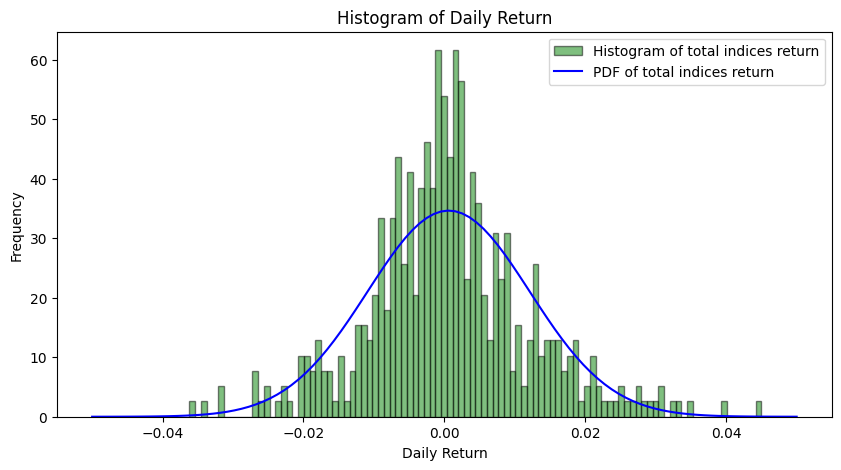

In [418]:
from scipy.stats import norm
# histogram of daily return
plt.figure(figsize=(10, 5))
plt.hist(total_indices['return'], bins=100, color='g', alpha=0.5, label='Histogram of total indices return',density=True, edgecolor='black')
# plot the PDF of daily return
x = np.linspace(-0.05, 0.05,100)
plt.plot(x, norm.pdf(x, total_indices['return'].mean(), total_indices['return'].std()), color='b', label='PDF of total indices return')
plt.legend()
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Return')

plt.show()


# B)
Symmetric or asymmetric of total idices return distribution

In [425]:
# Check whether the distribution is symmetrical or asymmetrical using relevant tests
from scipy.stats import normaltest,  kstest, skewtest, normaltest 

print('Skewness test of total indices return distribution: ', skewtest(total_indices['return']))
print('\nSkewness of total indices return distribution: ', total_indices['return'].skew())
print('\nKolmogorov-Smirnov test of total indices return distribution: ', kstest(total_indices['return'], 'norm'))
print('\nDAgostinos K^2 test of total indices return distribution: ', normaltest(total_indices['return']))
print('\nmean of total indices return distribution: ', total_indices['return'].mean())
print('standard deviation of total indices return distribution: ', total_indices['return'].std())


print('\n\033[1m' + '\033[4m' + 'Result:' + '\033[0m')
if skewtest(total_indices['return'])[1] < 0.05:
    print('\033[1m'+'The distribution of total indices return is asymmetrical')
else:
    print('\033[1m'+'The distribution of total indices return is symmetrical')


Skewness test of total indices return distribution:  SkewtestResult(statistic=2.255719696414678, pvalue=0.024088191245966156)

Skewness of total indices return distribution:  0.25292167599694254

Kolmogorov-Smirnov test of total indices return distribution:  KstestResult(statistic=0.48556893244935373, pvalue=9.353798977288398e-105)

DAgostinos K^2 test of total indices return distribution:  NormaltestResult(statistic=18.34810107812115, pvalue=0.00010369563470227627)

mean of total indices return distribution:  0.0005996449201354784
standard deviation of total indices return distribution:  0.01151990441035642

Result:
The distribution of total indices return is asymmetrical


# C)
calculate the mean and standard deviation of each stock return

In [426]:
# calculate daily return value for each stock
for stock in stocks:
    stock = clculate_return(stock, '<CLOSE>')

stocks[0]
    

<TICKER>  <DTYYYYMMDD>  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
0    Iran.China.Clay      20230201  13450.0  13600.0  13030.0  13340.0   
1    Iran.China.Clay      20230131  13280.0  13760.0  12910.0  13360.0   
2    Iran.China.Clay      20230130  13950.0  13950.0  12920.0  13390.0   
3    Iran.China.Clay      20230129  14290.0  14290.0  13580.0  13590.0   
4    Iran.China.Clay      20230128  14430.0  14600.0  14130.0  14290.0   
..               ...           ...      ...      ...      ...      ...   
474  Iran.China.Clay      20210208  45600.0  45600.0  43090.0  44200.0   
475  Iran.China.Clay      20210207  43980.0  46000.0  42620.0  44300.0   
476  Iran.China.Clay      20210206  47300.0  47300.0  43320.0  44860.0   
477  Iran.China.Clay      20210203  45240.0  47160.0  44000.0  45590.0   
478  Iran.China.Clay      20210202  46560.0  46560.0  43900.0  45940.0   

          <VALUE>      <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>    return  
0    3.184133e+09   240844.0      128.0     D  13360.0  13600.0 -0.001497  
1    8.969204e+09   672736.0      216.0     D  13390.0  13300.0 -0.002240  
2    1.124110e+10   848242.0      278.0     D  13590.0  13280.0 -0.014717  
3    2.394833e+10  1762501.0      227.0     D  14290.0  13580.0 -0.048985  
4    2.719311e+10  1902650.0      257.0     D  14870.0  14320.0 -0.039005  
..            ...        ...        ...   ...      ...      ...       ...  
474  7.314092e+09   167625.0      202.0     D  44300.0  43270.0 -0.002257  
475  2.513558e+10   573883.0      426.0     D  44860.0  43500.0 -0.012483  
476  1.582252e+10   364532.0      281.0     D  45590.0  43740.0 -0.016012  
477  1.062728e+10   239310.0      220.0     D  45940.0  44050.0 -0.007619  
478  4.610054e+09   103022.0       92.0     D  46070.0  44850.0  0.000000  

[479 rows x 13 columns]

mean of return of  Iran.China.Clay  is:  -0.0019307187846566566
variance of return of  Iran.China.Clay  is:  0.0009453416169190381
std of return of  Iran.China.Clay  is:  0.030746408195414274
---------------------------------
mean of return of  Iran.Khodro  is:  0.0005386224251596697
variance of return of  Iran.Khodro  is:  0.0006655977602160631
std of return of  Iran.Khodro  is:  0.02579918138654913
---------------------------------
mean of return of  S*Mobarakeh.Steel  is:  -0.0005736916280916049
variance of return of  S*Mobarakeh.Steel  is:  0.0011333485089722584
std of return of  S*Mobarakeh.Steel  is:  0.03366524185227634
---------------------------------
mean of return of  Social.Sec.Inv  is:  -0.0029195098141805227
variance of return of  Social.Sec.Inv  is:  0.0025026653245125503
std of return of  Social.Sec.Inv  is:  0.05002664614495509
---------------------------------
mean of return of  ToseAtlasMofid.ETF  is:  0.0009880772053727838
variance of return of  ToseAtlasMofid.ETF  

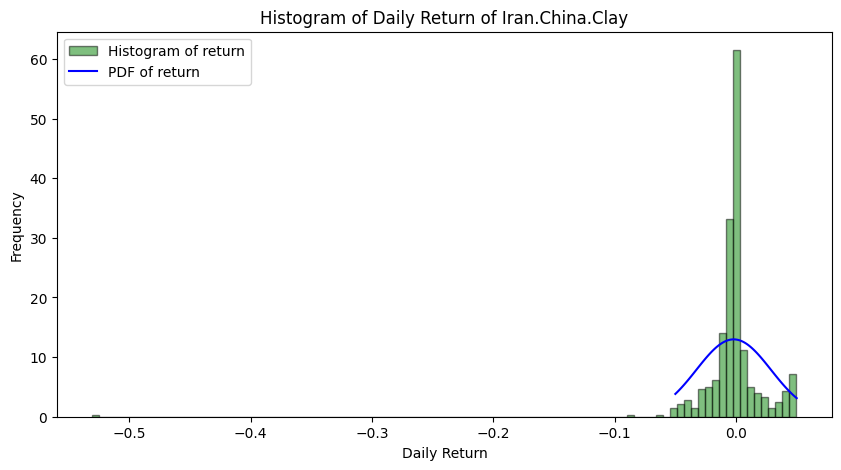

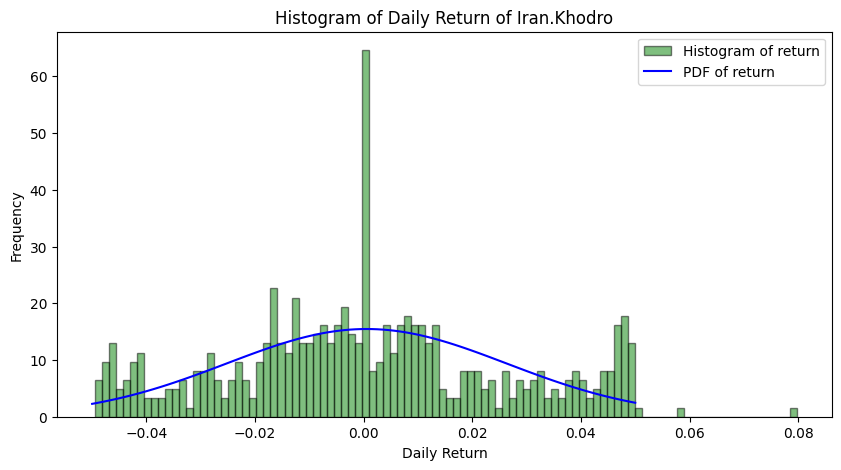

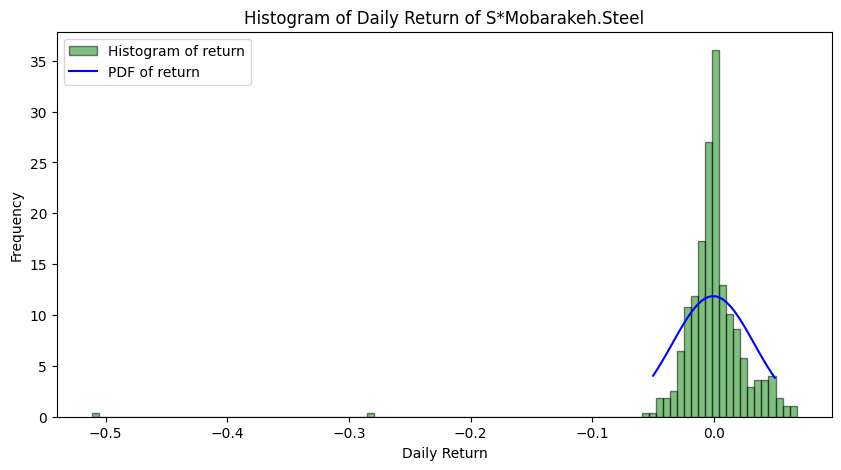

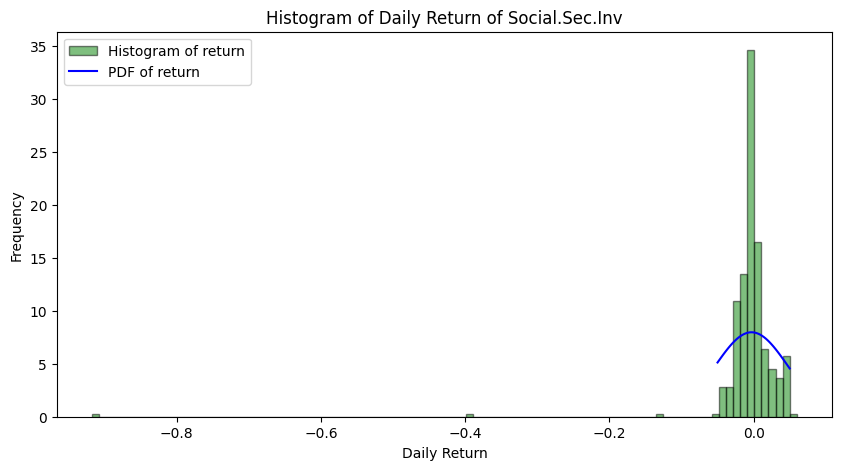

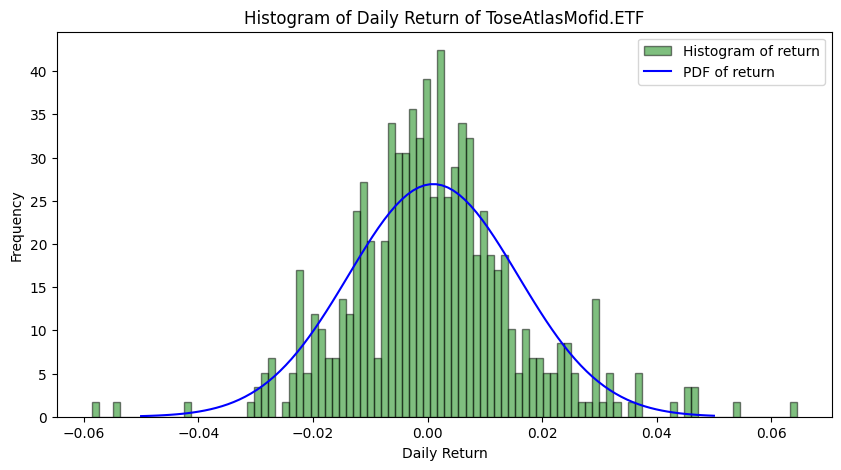

In [428]:
# calculate the mean and variance of each stock return
for stock in stocks:
    print('mean of return of ',stock['<TICKER>'].iloc[0],' is: ',stock['return'].mean())
    print('variance of return of ',stock['<TICKER>'].iloc[0],' is: ',stock['return'].var())
    print('std of return of ',stock['<TICKER>'].iloc[0],' is: ',stock['return'].std())
    print("---------------------------------")


#plot the histogram of daily return for each stock
for stock in stocks:
    plt.figure(figsize=(10, 5))
    plt.hist(stock['return'], bins=100, color='g', alpha=0.5, label='Histogram of return',density=True, edgecolor='black')
    # plot the PDF of daily return
    x = np.linspace(-0.05, 0.05,100)
    plt.plot(x, norm.pdf(x, stock['return'].mean(), stock['return'].std()), color='b', label='PDF of return')
    plt.legend()
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Histogram of Daily Return of '+stock['<TICKER>'].iloc[0])
    plt.show()



# D)
Check the changes in the average and variance of the return of the total index and each of the shares in specific time windows (10, 20 and 50 days) over time.

In [449]:
a=[1,2,3,4,5,6,7,8,9,10]
a= np.array(a)
#second max value
a[np.argsort(a)[-1]] = a[np.argsort(a)[-3]]
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 8])

In [466]:
# set date as index
date = total_indices['<DTYYYYMMDD>'].sort_values()
# calculate mean and variance of each stock with diffrent window size
def calculate_mean_var(data,window_size):
    mean_return = data['return'].rolling(window=window_size).mean().diff()
    var_return = data['return'].rolling(window=window_size).var().diff()
    for i in range(len(mean_return)):
        # normalize the mean and variance
        if mean_return[i] > 0.04:
            mean_return[i] = mean_return[i]/3
        elif mean_return[i] < -0.04:
            mean_return[i] = mean_return[i]/3
        if mean_return[i] > 0.02:
            mean_return[i] = mean_return[i]/1.5
        elif mean_return[i] < -0.02:
            mean_return[i] = mean_return[i]/1.5


        if var_return[i] > 0.02:
            var_return[i] = var_return[i]/5
        elif var_return[i] < -0.02:
            var_return[i] = var_return[i]/5
        if var_return[i] > 0.01:
            var_return[i] = var_return[i]/5
        elif var_return[i] < -0.01:
            var_return[i] = var_return[i]/5
        if var_return[i] > 0.005:
            var_return[i] = var_return[i]/2
        elif var_return[i] < -0.005:
            var_return[i] = var_return[i]/2
    return mean_return, var_return

#plot mean and variance of each stock with diffrent window size
def plot_mean_var(MV_data,MV_total_indices,window_size, title, name, date=date):
    plt.figure(figsize=(15, 5))
    plt.plot(MV_data, color='b', label='mean of '+str(name)+' return')
    plt.plot(MV_total_indices,  color='r', label= 'mean of total indices return')
    plt.legend()
    #set date as x axis start date[0] end date[last]
    plt.xticks(np.arange(0, len(date), 100), date[0:len(date)-1:100], rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.title( str(title)+' ==> \''+str(name)+ '\' vs \'total indices\' - window : '+str(window_size))
    plt.show()

480


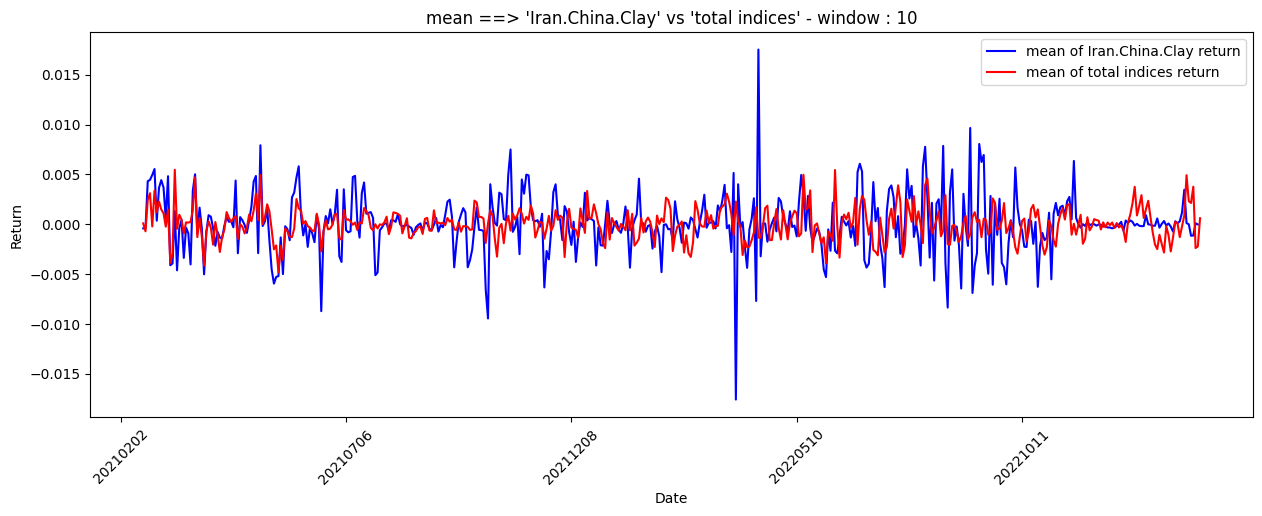

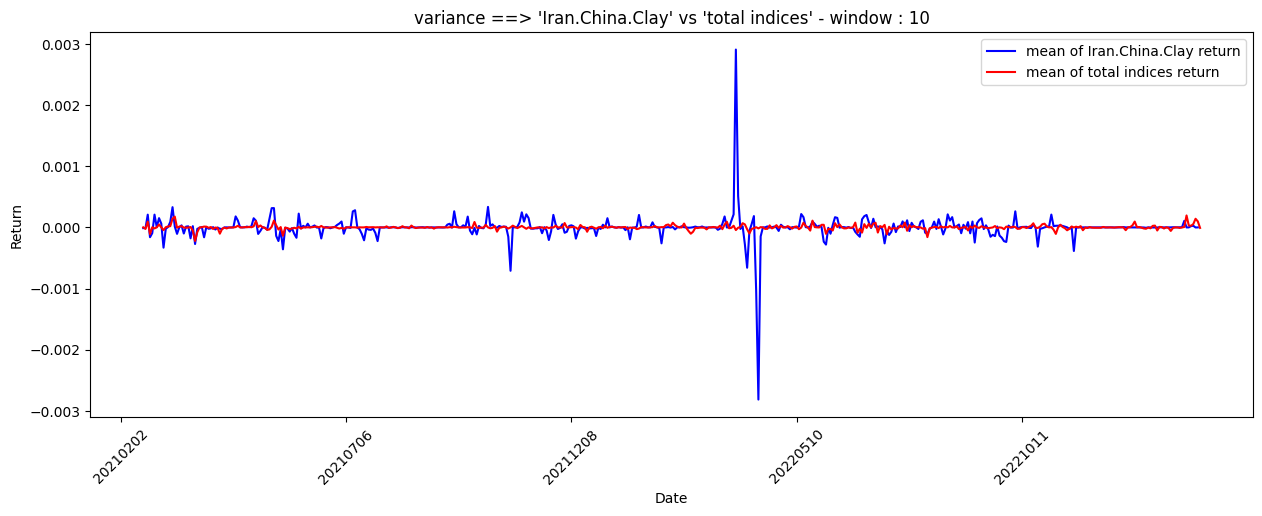

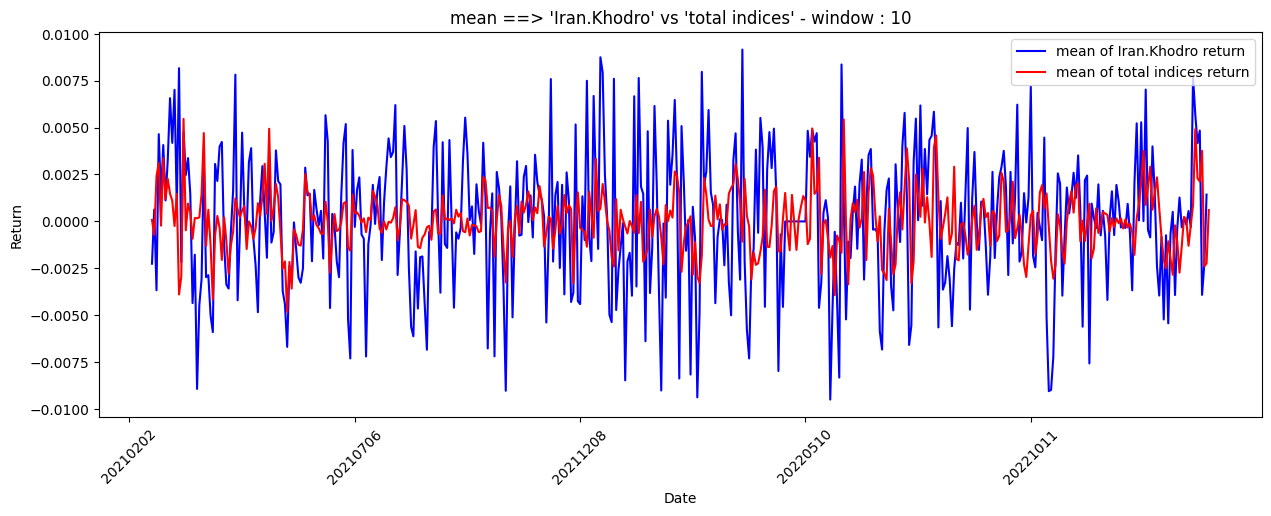

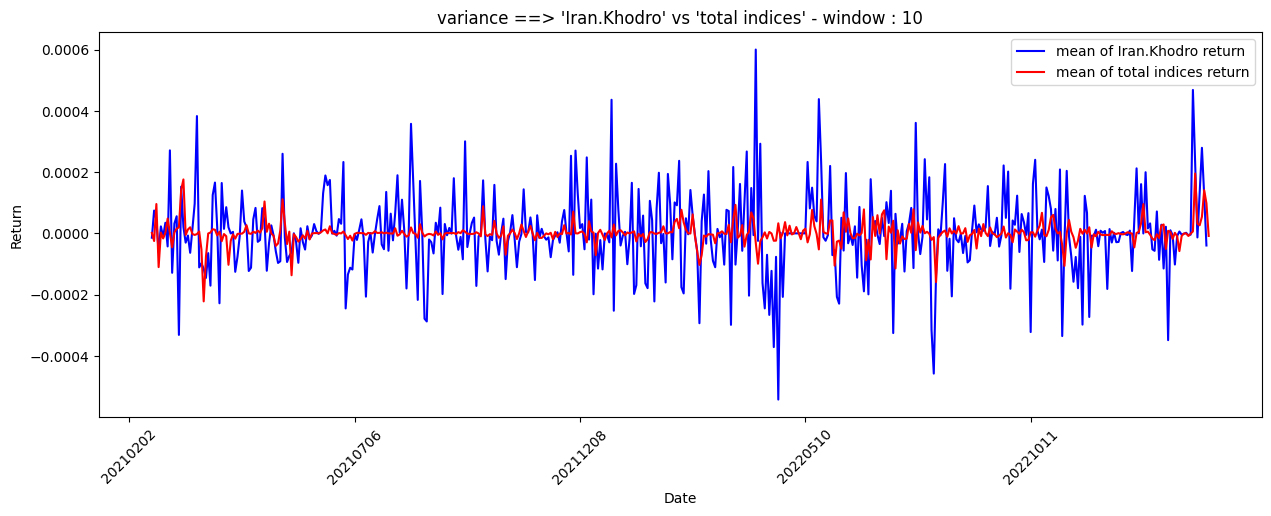

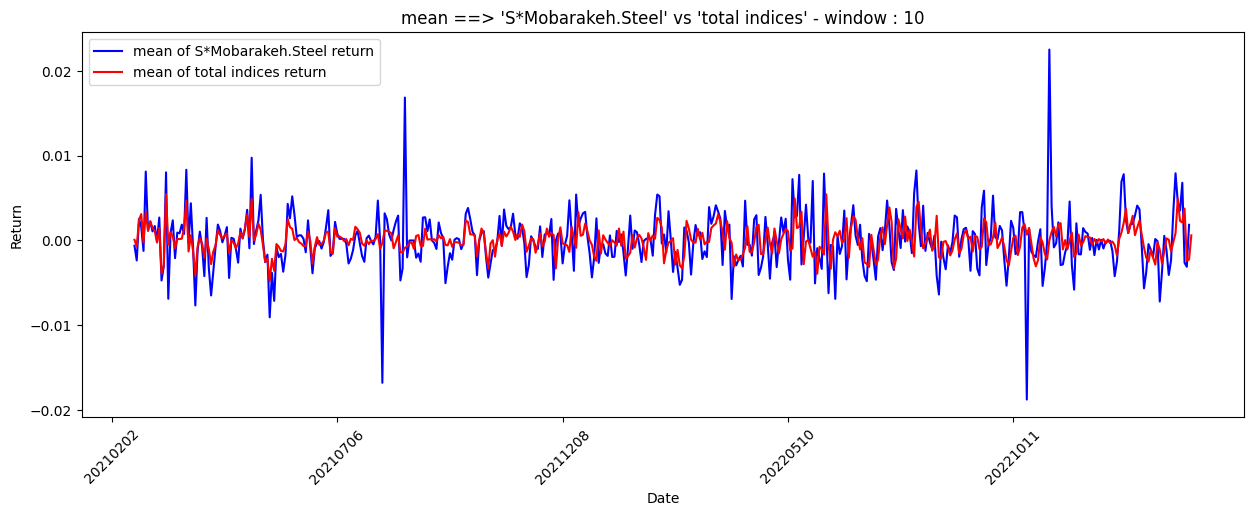

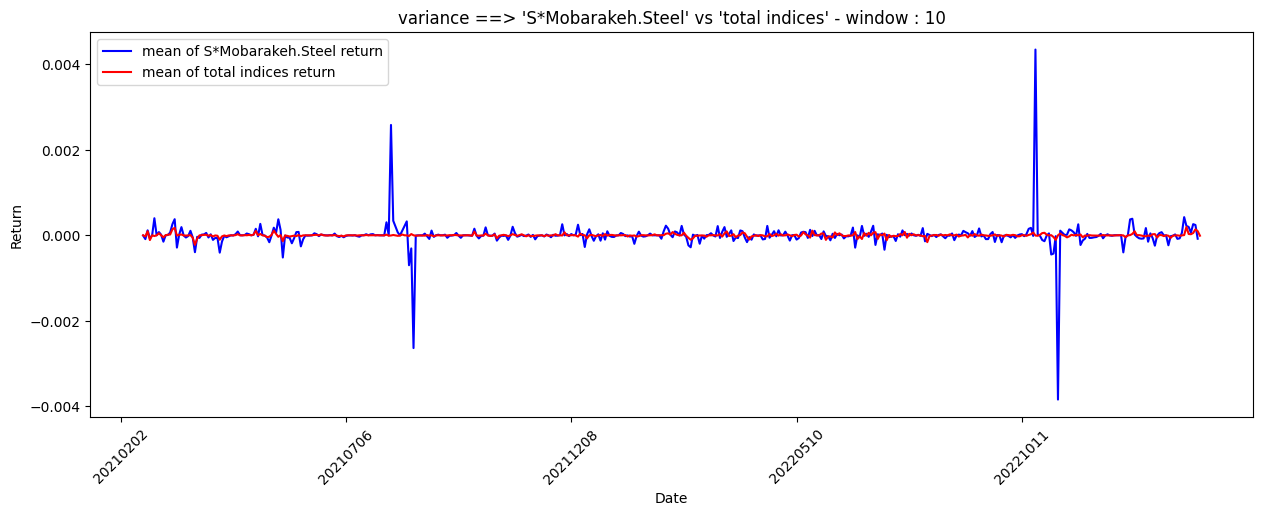

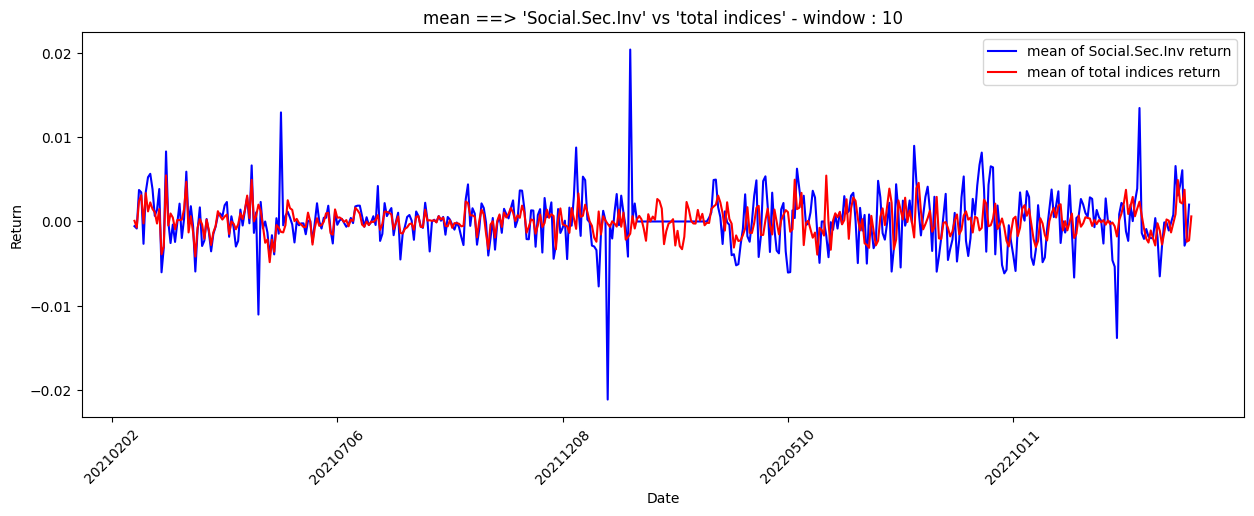

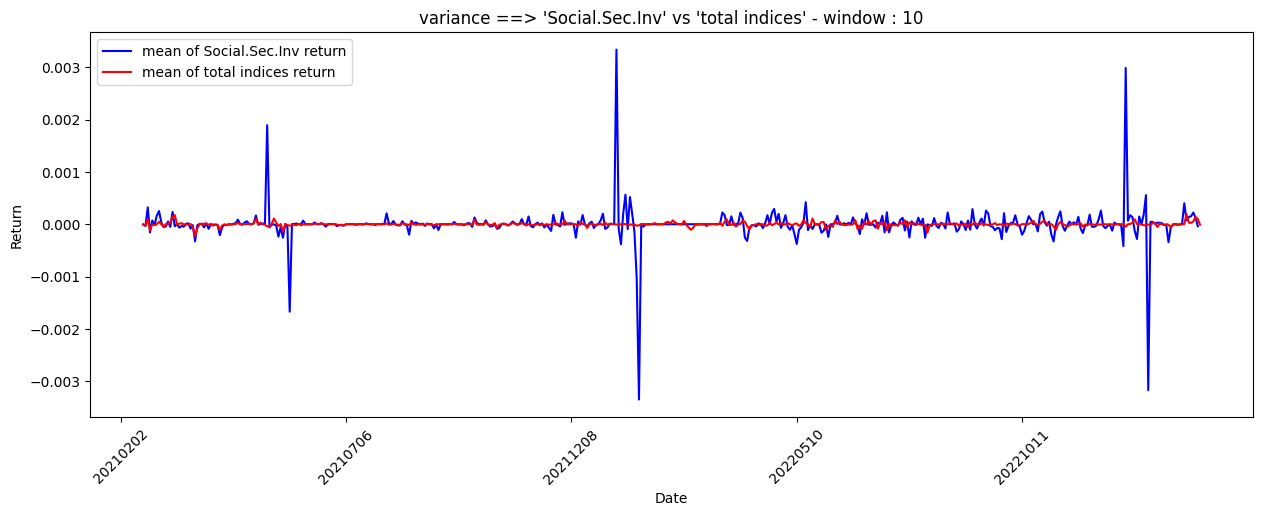

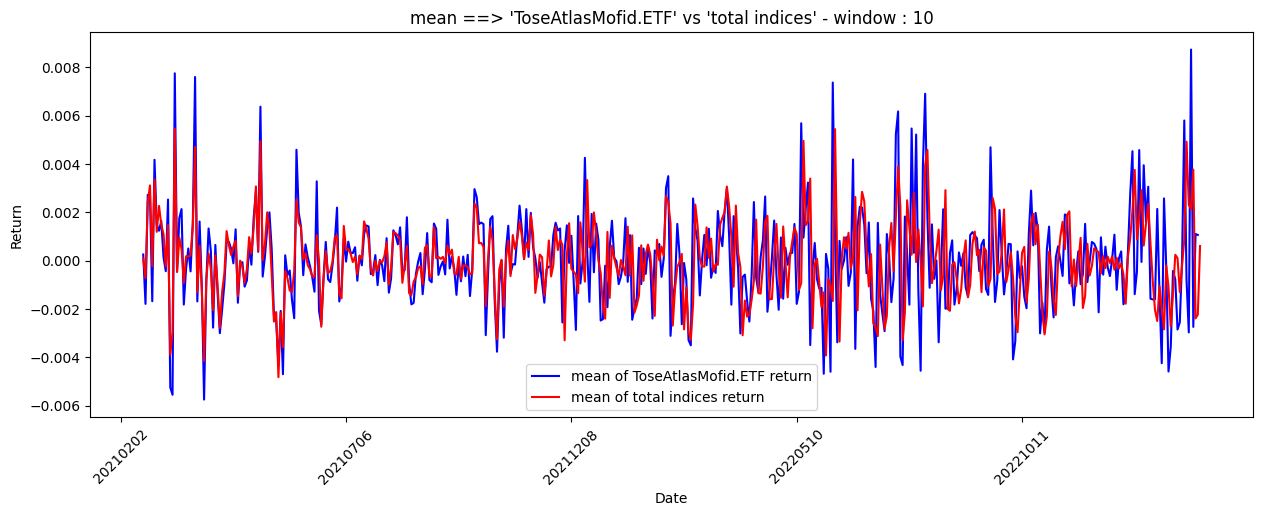

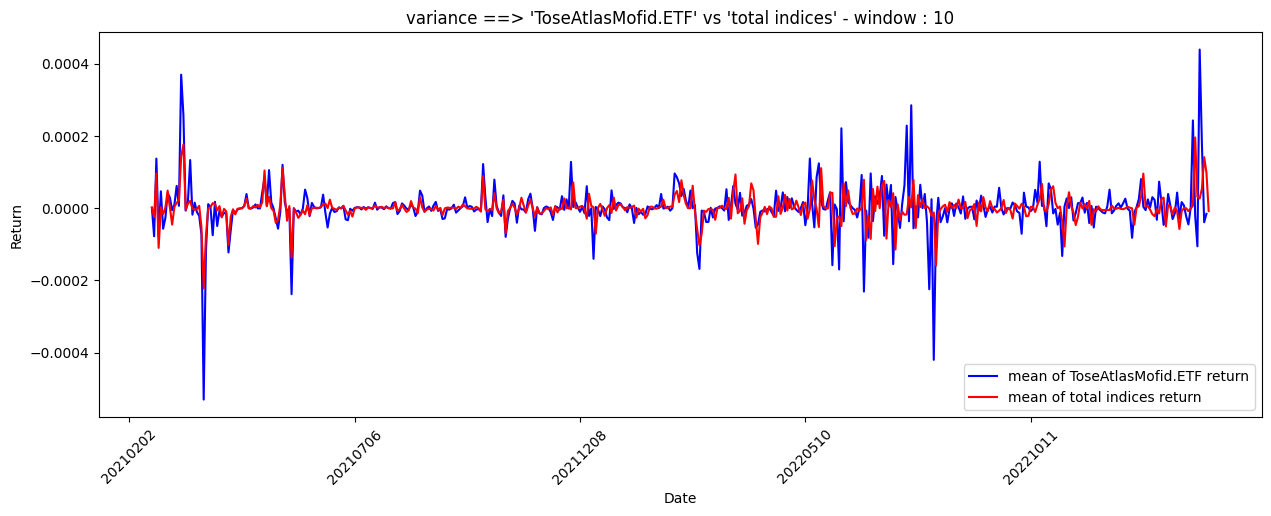

In [467]:
# window 10
total_mean_10, total_var_10 = calculate_mean_var(total_indices,10)
print(len(total_mean_10))

for stock in stocks:
    mean_10, var_10 = calculate_mean_var(stock,10)
    plot_mean_var(mean_10,total_mean_10,10,'mean',stock['<TICKER>'].iloc[0])
    plot_mean_var(var_10,total_var_10,10,'variance',stock['<TICKER>'].iloc[0])

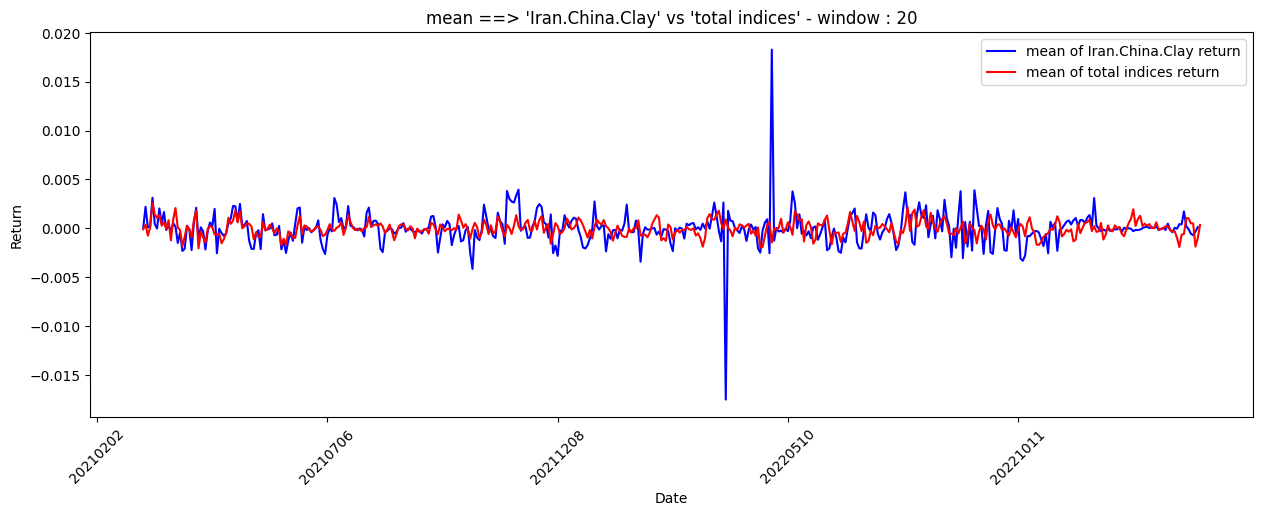

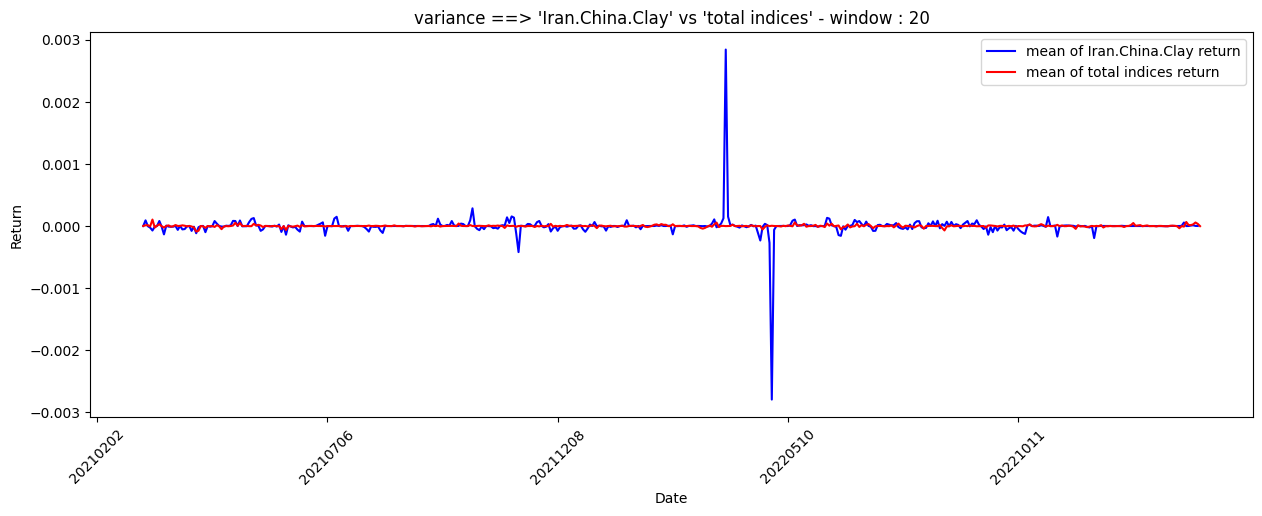

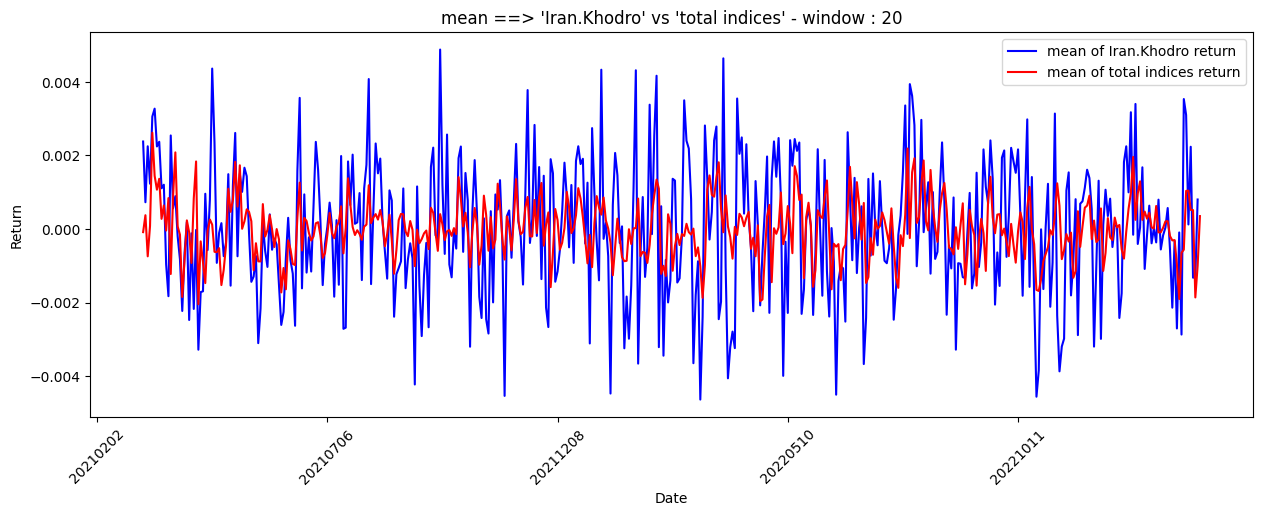

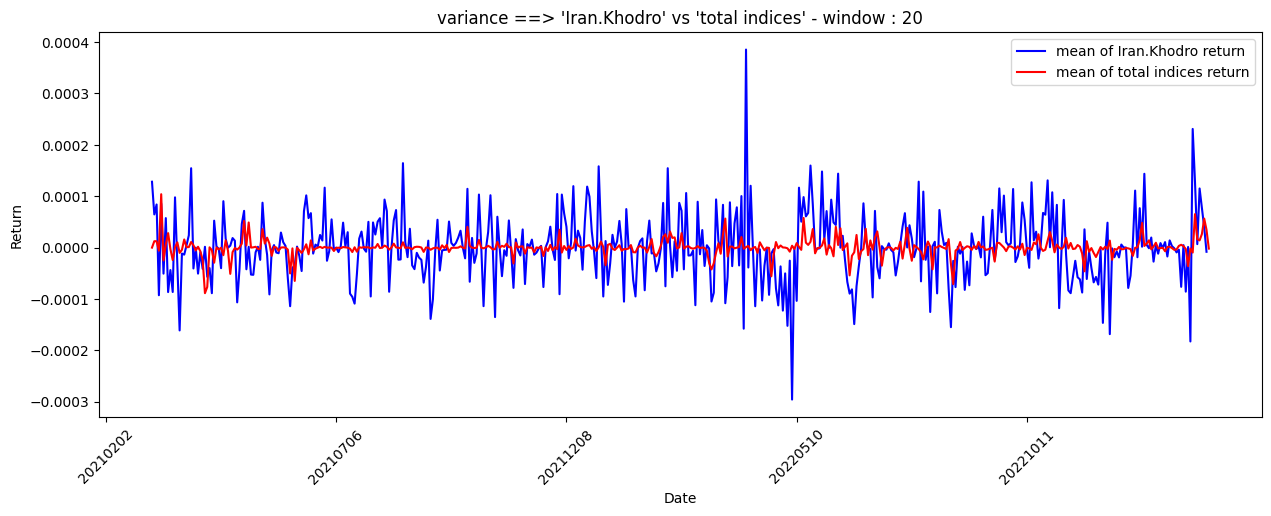

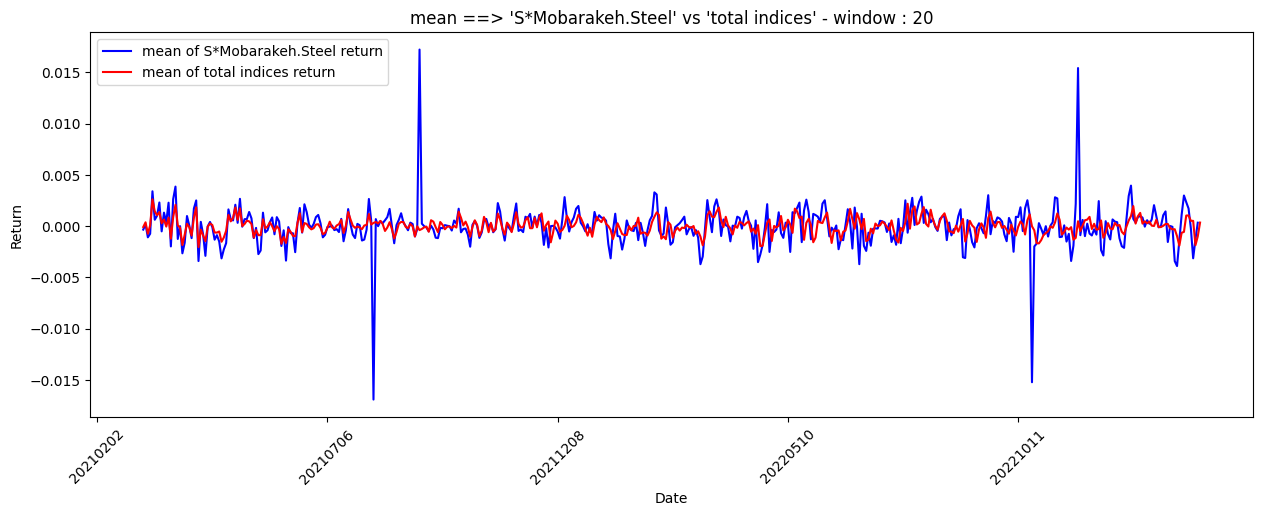

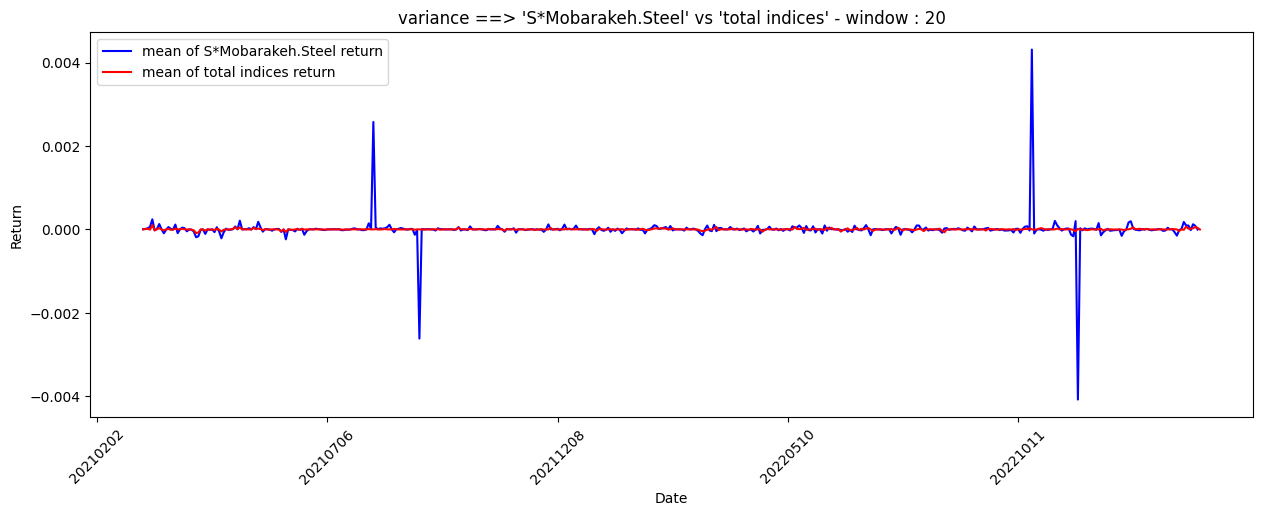

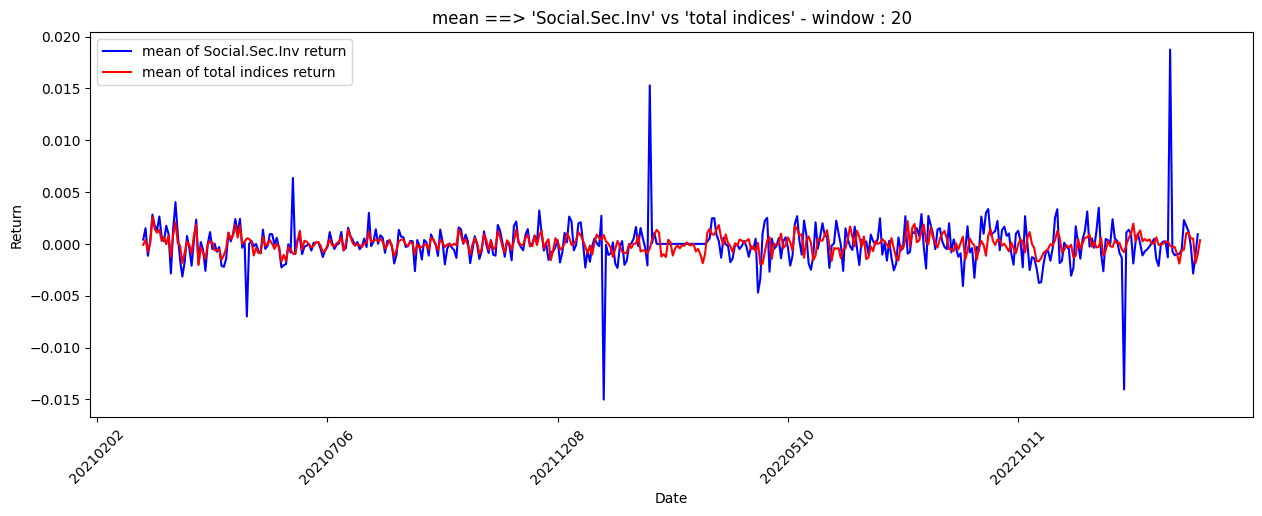

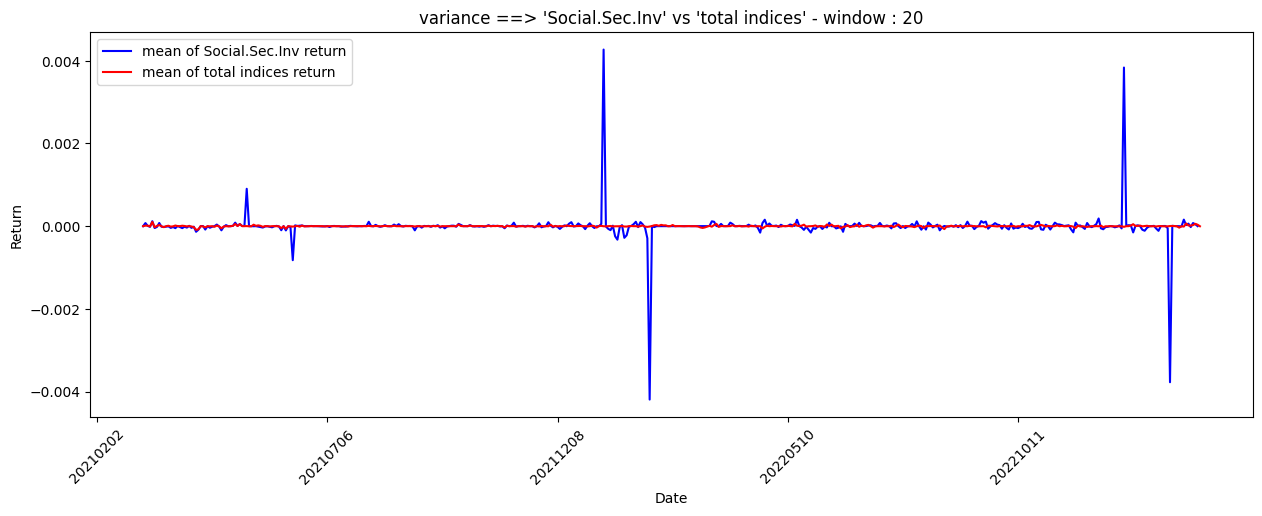

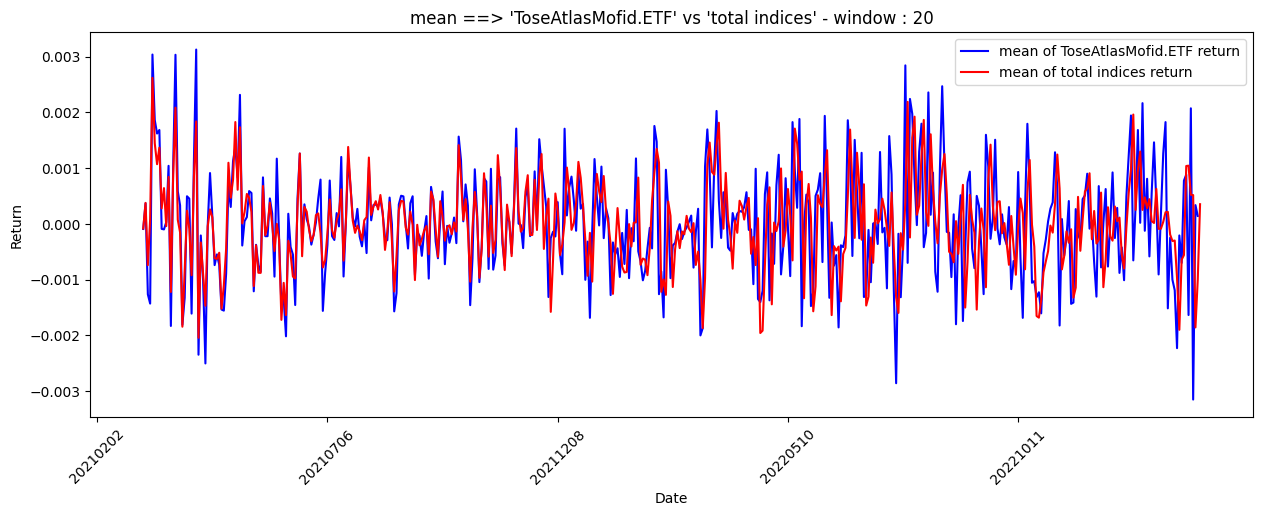

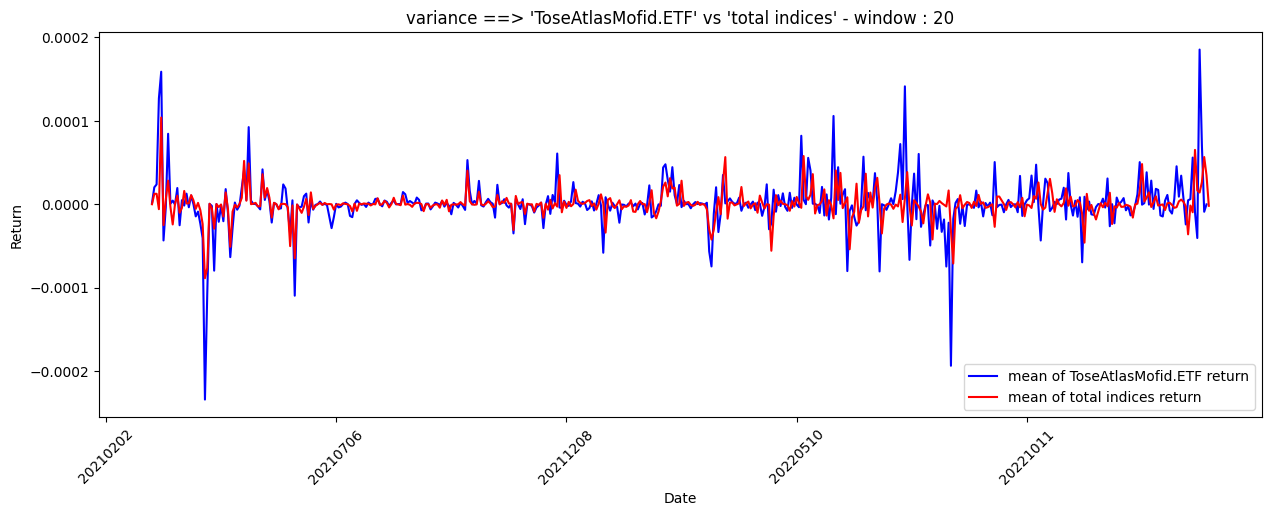

In [468]:
#windows 20
total_mean_20, total_var_20 = calculate_mean_var(total_indices,20)

for stock in stocks:
    mean_20, var_20 = calculate_mean_var(stock,20)
    plot_mean_var(mean_20,total_mean_20,20,'mean',stock['<TICKER>'].iloc[0])
    plot_mean_var(var_20,total_var_20,20,'variance',stock['<TICKER>'].iloc[0])

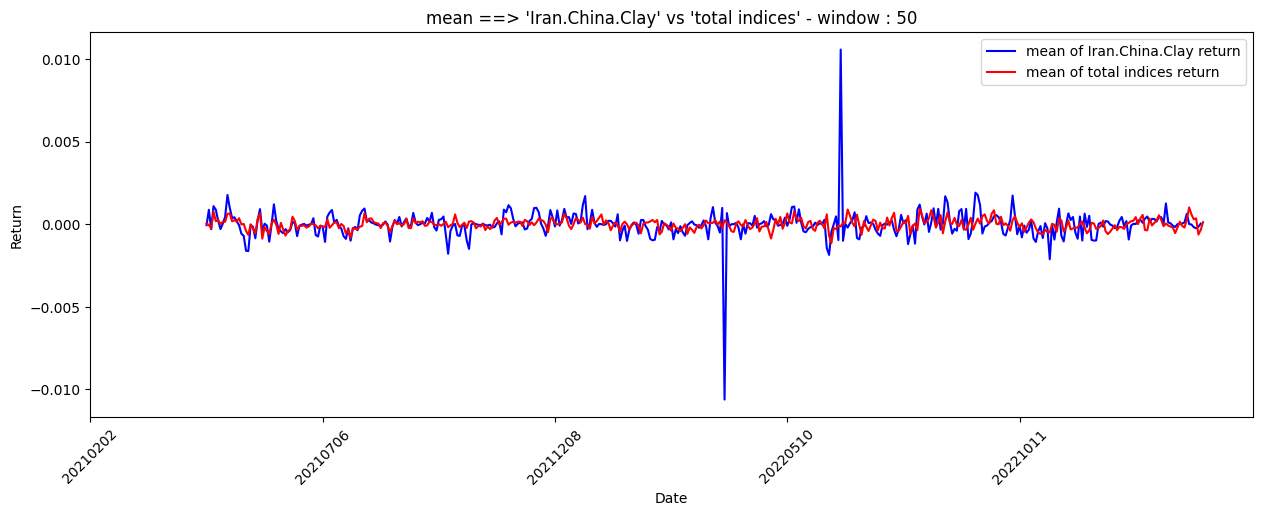

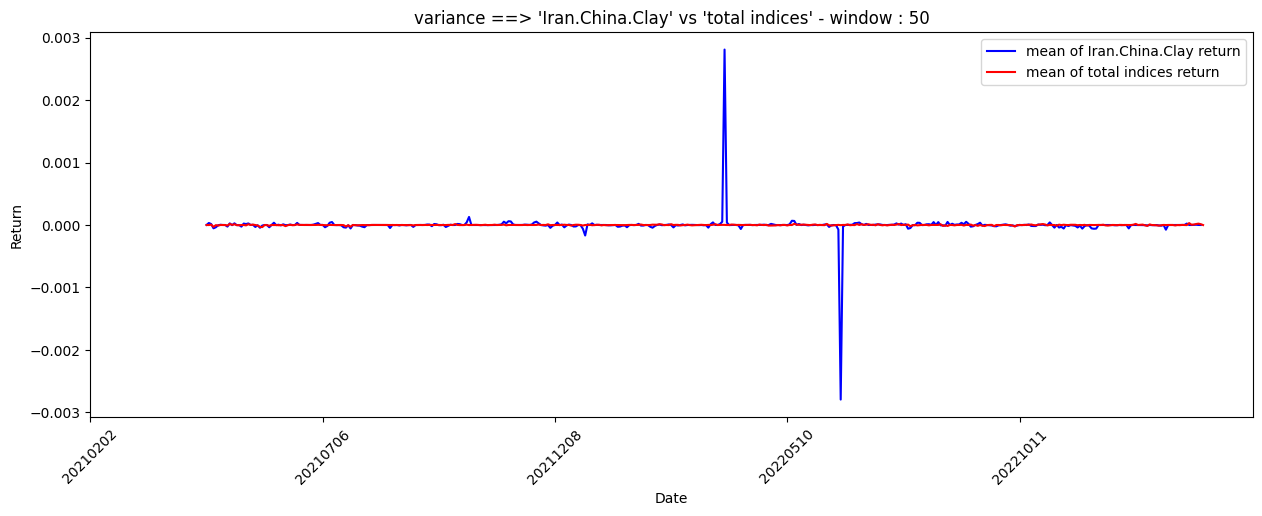

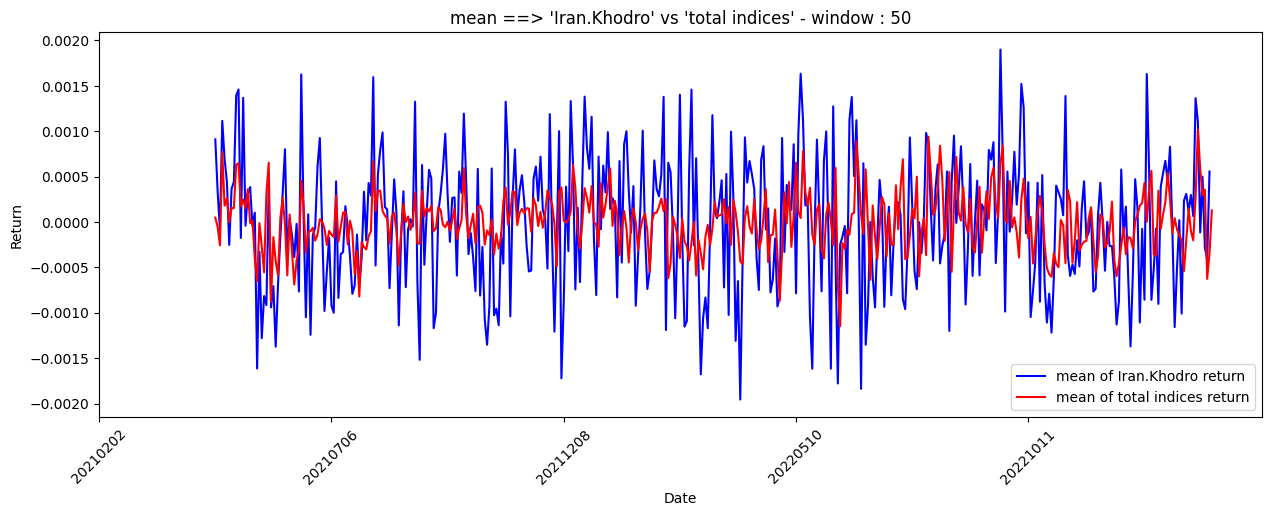

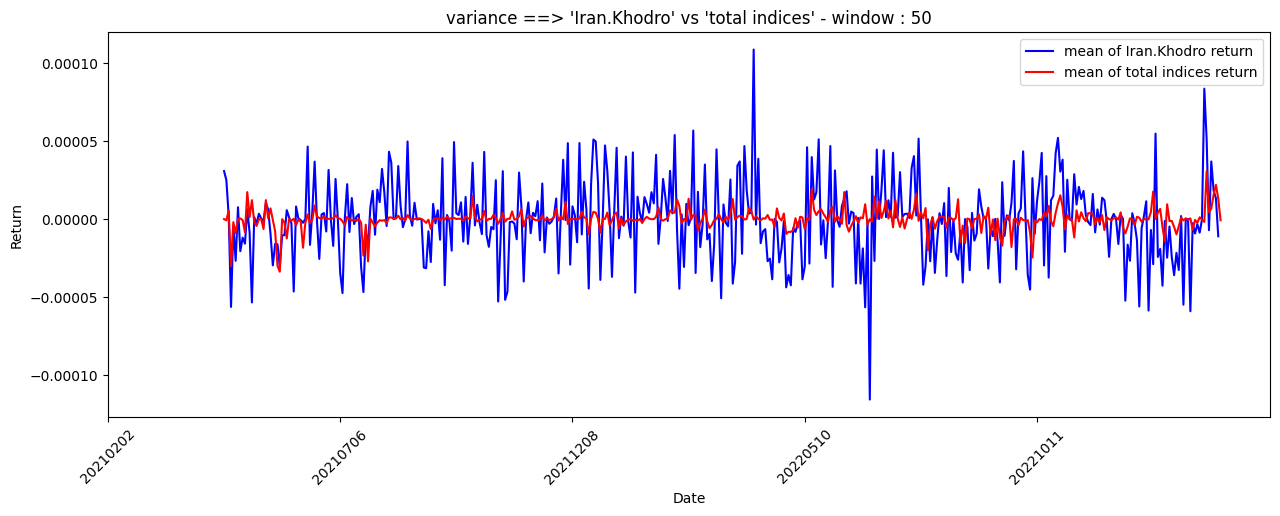

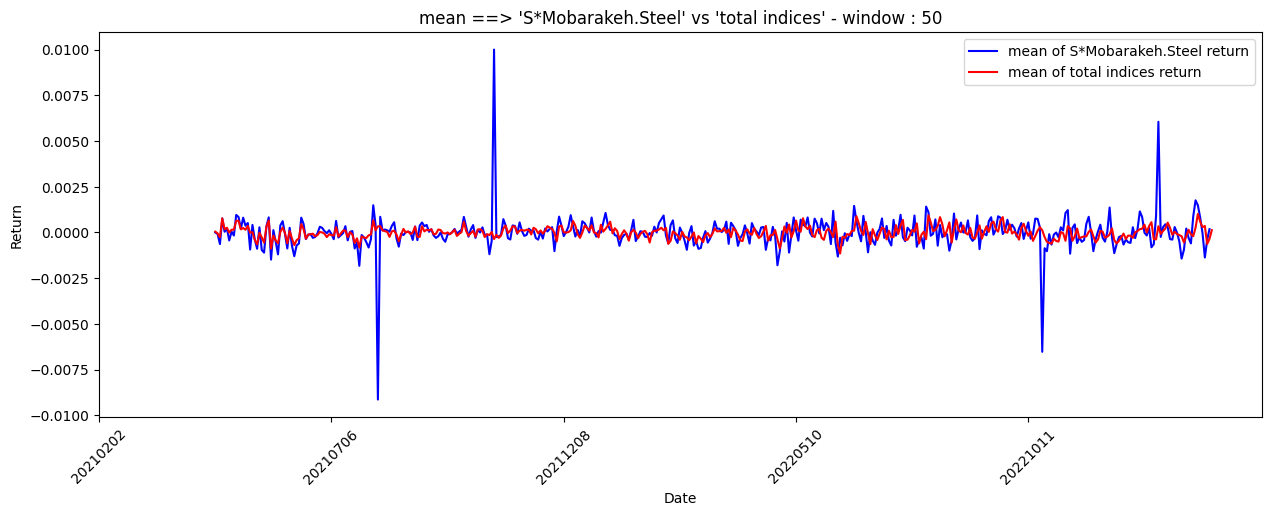

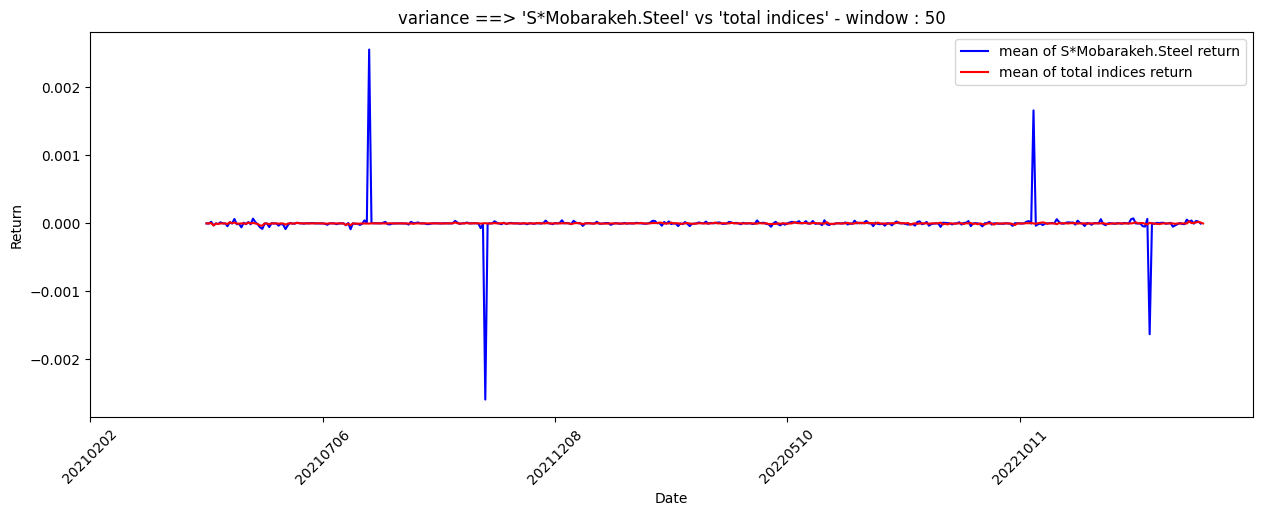

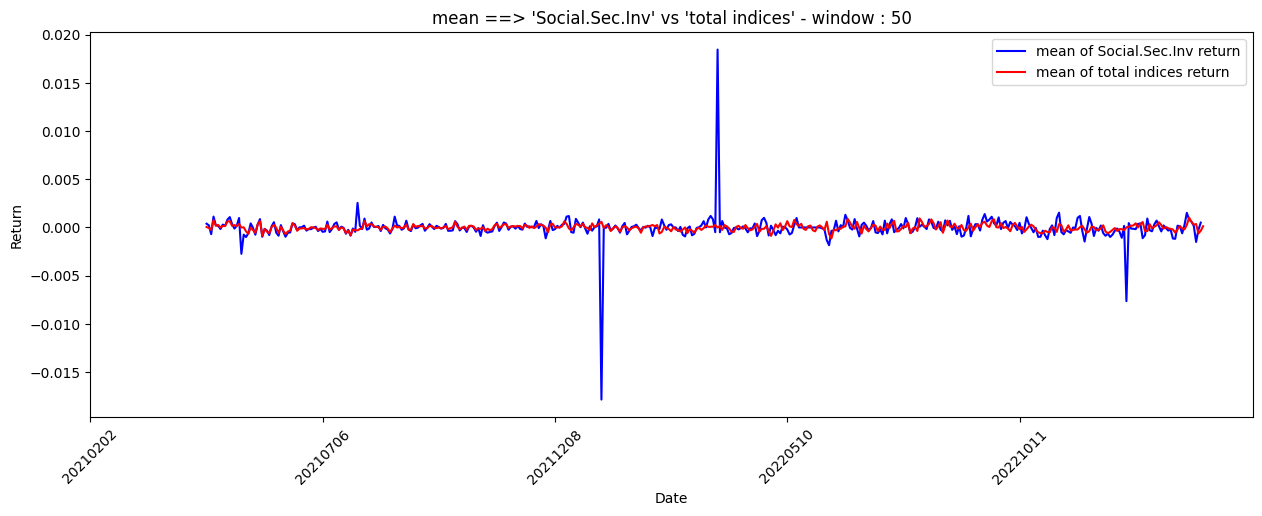

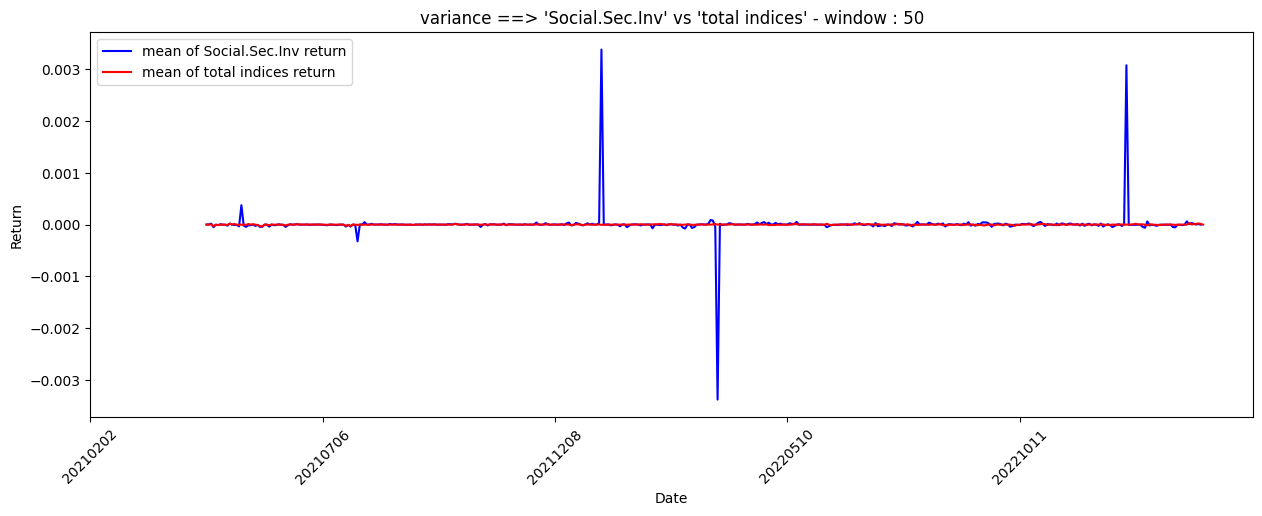

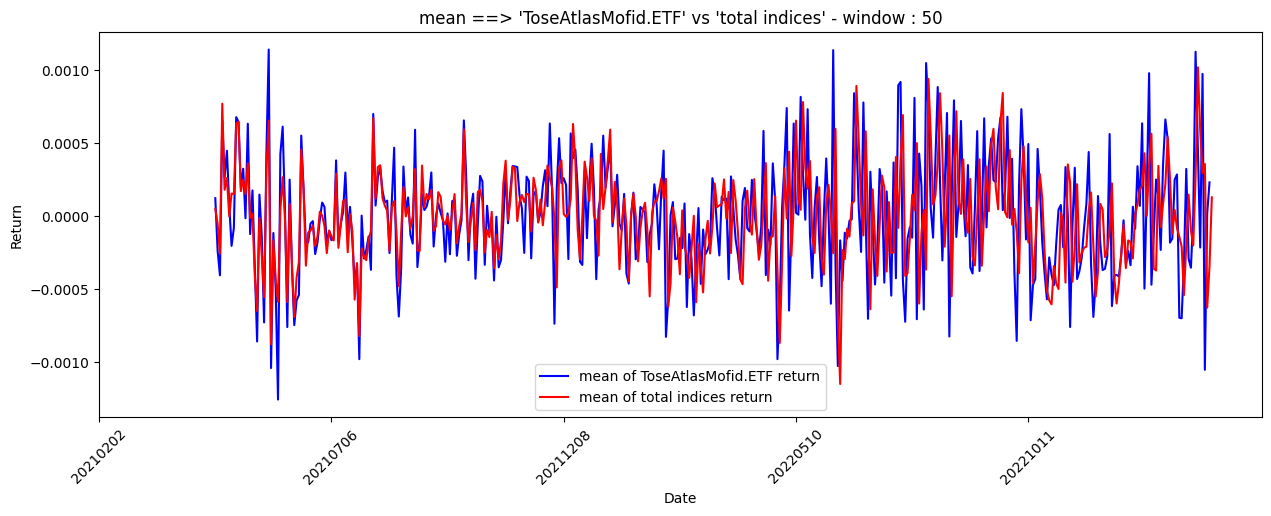

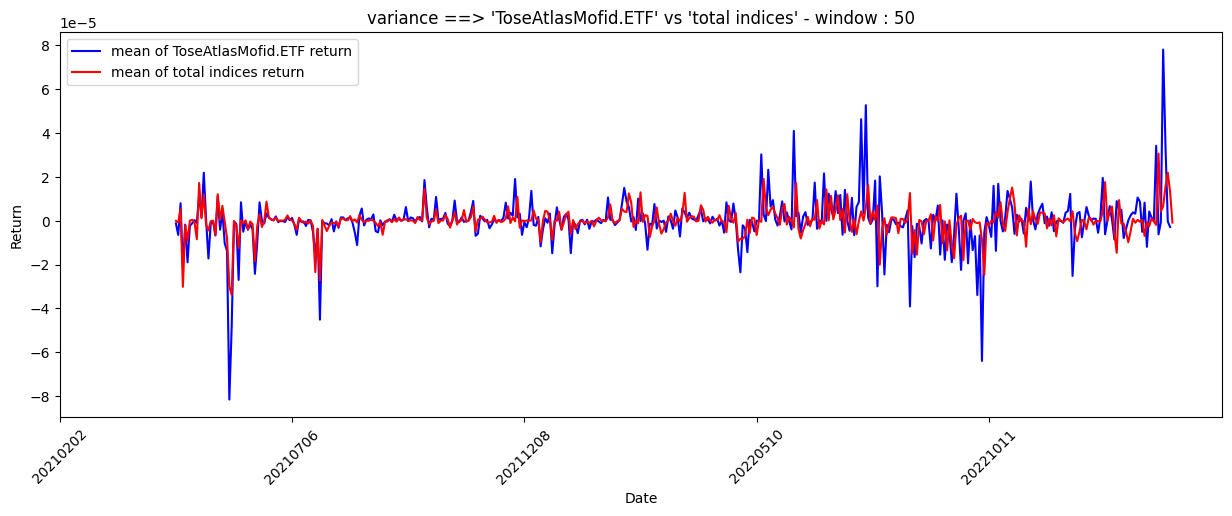

In [469]:
#windows 50
total_mean_50, total_var_50 = calculate_mean_var(total_indices,50)

for stock in stocks:
    mean_50, var_50 = calculate_mean_var(stock,50)
    plot_mean_var(mean_50,total_mean_50,50,'mean',stock['<TICKER>'].iloc[0])
    plot_mean_var(var_50,total_var_50,50,'variance',stock['<TICKER>'].iloc[0])

# Part 2.
# A)
Calculate and analyze the amount of autocorrelation return of the total index of different time lags (1 to 5 days).


autocorrelation with lag= 1 is : 0.2974189392944751
autocorrelation with lag= 2 is : 0.003669522910023966
autocorrelation with lag= 3 is : 0.13400637342822638
autocorrelation with lag= 4 is : 0.03701574877039716
autocorrelation with lag= 5 is : -0.026083400538123948


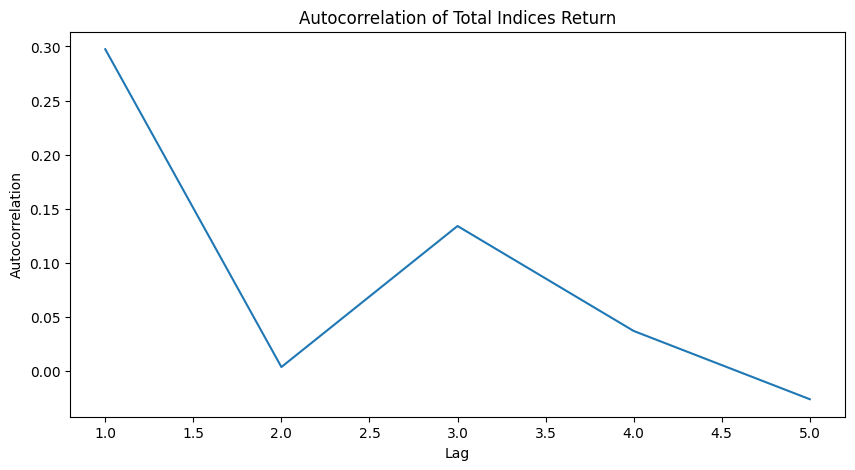

In [470]:
# Calculate and analyze the amount of autocorrelation (return of the total index of different time lags (1 to 5 days).

# calculate the autocorrelation of total indices return
def autocorrelation(data, lag):
    return data['return'].autocorr(lag=lag)

# calculate the autocorrelation of total indices return for different lags
def autocorrelation_for_different_lags(data):
    autocorrelation_list = []
    for i in range(1,6):
        autocorrelation_list.append(autocorrelation(data, i))
    return autocorrelation_list

# plot the autocorrelation of total indices return for different lags
def plot_autocorrelation(autocorrelation):
    plt.figure(figsize=(10, 5))
    plt.plot([1,2,3,4,5],autocorrelation)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation of Total Indices Return')
    plt.show()

autocorrelation_list = autocorrelation_for_different_lags(total_indices)
print('autocorrelation with lag= {} is : {}'.format(1,autocorrelation_list[0]))
print('autocorrelation with lag= {} is : {}'.format(2,autocorrelation_list[1]))
print('autocorrelation with lag= {} is : {}'.format(3,autocorrelation_list[2]))
print('autocorrelation with lag= {} is : {}'.format(4,autocorrelation_list[3]))
print('autocorrelation with lag= {} is : {}'.format(5,autocorrelation_list[4]))

plot_autocorrelation(autocorrelation_list)


# B)
Calculate the correlation between the return of the total index and the return of each of the desired shares

In [471]:
# merg the total indices and stocks data
merged_data=[]
def merge_data(total_indices, stocks):
    temp = pd.merge(total_indices, stocks, on='<DTYYYYMMDD>')
    temp = temp.rename(columns={'<DTYYYYMMDD>': 'Date'})
    temp = temp.drop(columns=['<TICKER>'])
    return temp

for stock in stocks:
    merged_data.append(merge_data(total_indices, stock))
merged_data[0].head()

Date   <VALUE>_x  return_x  <FIRST>   <HIGH>    <LOW>  <CLOSE>  \
0  20230201  1557244.00  0.000445  13450.0  13600.0  13030.0  13340.0   
1  20230131  1556551.90  0.010958  13280.0  13760.0  12910.0  13360.0   
2  20230130  1539679.61 -0.001628  13950.0  13950.0  12920.0  13390.0   
3  20230129  1542190.69 -0.036181  14290.0  14290.0  13580.0  13590.0   
4  20230128  1600083.66 -0.007365  14430.0  14600.0  14130.0  14290.0   

      <VALUE>_y      <VOL>  <OPENINT> <PER>   <OPEN>   <LAST>  return_y  
0  3.184133e+09   240844.0      128.0     D  13360.0  13600.0 -0.001497  
1  8.969204e+09   672736.0      216.0     D  13390.0  13300.0 -0.002240  
2  1.124110e+10   848242.0      278.0     D  13590.0  13280.0 -0.014717  
3  2.394833e+10  1762501.0      227.0     D  14290.0  13580.0 -0.048985  
4  2.719311e+10  1902650.0      257.0     D  14870.0  14320.0 -0.039005

correlation between total indices return and Iran.China.Clay is : 0.2668998351007557
correlation between total indices return and Iran.Khodro is : 0.6172163845630182
correlation between total indices return and S*Mobarakeh.Steel is : 0.4875790807149877
correlation between total indices return and Social.Sec.Inv is : 0.28653975856350394
correlation between total indices return and ToseAtlasMofid.ETF is : 0.880946787387012


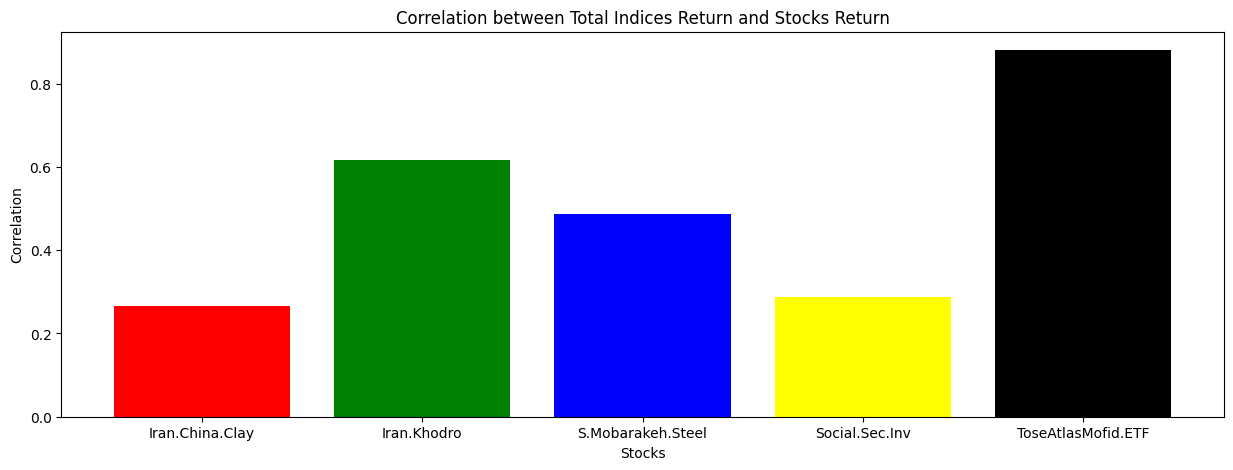

In [472]:
#  correlation between return_x and return_y
def correlation(data):
    return data['return_x'].corr(data['return_y'])

# calculate the correlation of total indices return and each stock return
def correlation_for_stocks(merged_data):
    correlation_list = []
    for i in range(len(merged_data)):
        correlation_list.append(correlation(merged_data[i]))
    return correlation_list

correlation_list = correlation_for_stocks(merged_data)
print('correlation between total indices return and {} is : {}'.format(stocks[0]['<TICKER>'][0],correlation_list[0]))
print('correlation between total indices return and {} is : {}'.format(stocks[1]['<TICKER>'][0],correlation_list[1]))
print('correlation between total indices return and {} is : {}'.format(stocks[2]['<TICKER>'][0],correlation_list[2]))
print('correlation between total indices return and {} is : {}'.format(stocks[3]['<TICKER>'][0],correlation_list[3]))
print('correlation between total indices return and {} is : {}'.format(stocks[4]['<TICKER>'][0],correlation_list[4]))

# plot the correlation of total indices return and each stock return
def plot_correlation(correlation_list, stock_names):
    plt.figure(figsize=(15, 5))
    plt.bar(stock_names,correlation_list, color=['red', 'green', 'blue', 'yellow', 'black', 'orange', 'purple'])
    plt.xlabel('Stocks')
    plt.ylabel('Correlation')
    plt.title('Correlation between Total Indices Return and Stocks Return')
    plt.show()

plot_correlation(correlation_list, stock_names)


# C)


Adding dollar & gold datset from finpy_tse library

In [368]:
import finpy_tse as fpy

dollar_dataset = fpy.Get_USD_RIAL(
             start_date='1399-11-14',
             end_date  ='1401-11-14',
             ignore_date=False,
             show_weekday=False,
             double_date=False).iloc[::-1]
dollar_dataset

https://www.tgju.org/profile/price_dollar_rl/technical
https://www.tgju.org/profile/price_dollar_rl/history


Open    High     Low   Close
J-Date                                    
1401-11-13  436050  436370  435810  436100
1401-11-12  437070  438090  425880  436440
1401-11-11  435880  438900  433310  437290
1401-11-10  439400  440900  433810  436560
1401-11-09  436480  439800  432800  438810
...            ...     ...     ...     ...
1399-11-19  237490  237550  236940  236960
1399-11-18  237520  237550  237440  237550
1399-11-16  237500  237550  237440  237470
1399-11-15  238680  238750  237640  237660
1399-11-14  238650  238750  238640  238710

[486 rows x 4 columns]

In [369]:
gold_dataset = fpy.Get_Price_History(
           stock='طلا',
           start_date='1399-11-14',
            end_date  ='1401-11-14',
           ignore_date=False,
           adjust_price=False,
           show_weekday=False,
           double_date=False)
gold_dataset

Open    High     Low   Close   Final    Volume          Value  \
J-Date                                                                        
1399-11-14   78000   78497   77410   78010   77816    302887    23569486634   
1399-11-15   76200   77200   75025   76980   76533    304792    23326504081   
1399-11-18   77127   77199   76660   77050   76849   1041142    80010877358   
1399-11-19   77400   78789   77131   78506   77896    454145    35376055884   
1399-11-20   81010   82202   81010   82200   81691    746437    60977179330   
...            ...     ...     ...     ...     ...       ...            ...   
1401-11-08  157200  161408  157200  157895  158732  10231523  1624074717704   
1401-11-09  159050  165998  159020  161500  162270  13707035  2224240695262   
1401-11-10  164490  164490  161711  162000  163088   5996543   977967134398   
1401-11-11  160000  162000  157501  161900  159857   5470458   874492111895   
1401-11-12  162500  163569  161960  163441  162887   4833843   787370720529   

              No Ticker                        Name   Market  
J-Date                                                        
1399-11-14   452    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1399-11-15   386    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1399-11-18   550    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1399-11-19   652    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1399-11-20  1034    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
...          ...    ...                         ...      ...  
1401-11-08  8395    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1401-11-09  9501    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1401-11-10  6295    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1401-11-11  4664    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  
1401-11-12  4486    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم  

[479 rows x 11 columns]

convert date to gregorian

In [370]:
#convert the date to gregorian
dates = []
for d in dollar_dataset.iterrows():
    day = d[0].split('-')
    day = JalaliDate(int(day[0]), int(day[1]), int(day[2])).to_gregorian()
    dates.append(day.strftime('%Y%m%d'))
#convert datestype to int   
dates = [int(i) for i in dates]
dollar_dataset['<DTYYYYMMDD>'] = dates
dollar_dataset

Open    High     Low   Close  <DTYYYYMMDD>
J-Date                                                  
1401-11-13  436050  436370  435810  436100      20230202
1401-11-12  437070  438090  425880  436440      20230201
1401-11-11  435880  438900  433310  437290      20230131
1401-11-10  439400  440900  433810  436560      20230130
1401-11-09  436480  439800  432800  438810      20230129
...            ...     ...     ...     ...           ...
1399-11-19  237490  237550  236940  236960      20210207
1399-11-18  237520  237550  237440  237550      20210206
1399-11-16  237500  237550  237440  237470      20210204
1399-11-15  238680  238750  237640  237660      20210203
1399-11-14  238650  238750  238640  238710      20210202

[486 rows x 5 columns]

In [371]:
dates = []
for d in gold_dataset.iterrows():
    day = d[0].split('-')
    day = JalaliDate(int(day[0]), int(day[1]), int(day[2])).to_gregorian()
    dates.append(day.strftime('%Y%m%d'))
#convert datestype to int   
dates = [int(i) for i in dates]
gold_dataset['<DTYYYYMMDD>'] = dates
gold_dataset

Open    High     Low   Close   Final    Volume          Value  \
J-Date                                                                        
1399-11-14   78000   78497   77410   78010   77816    302887    23569486634   
1399-11-15   76200   77200   75025   76980   76533    304792    23326504081   
1399-11-18   77127   77199   76660   77050   76849   1041142    80010877358   
1399-11-19   77400   78789   77131   78506   77896    454145    35376055884   
1399-11-20   81010   82202   81010   82200   81691    746437    60977179330   
...            ...     ...     ...     ...     ...       ...            ...   
1401-11-08  157200  161408  157200  157895  158732  10231523  1624074717704   
1401-11-09  159050  165998  159020  161500  162270  13707035  2224240695262   
1401-11-10  164490  164490  161711  162000  163088   5996543   977967134398   
1401-11-11  160000  162000  157501  161900  159857   5470458   874492111895   
1401-11-12  162500  163569  161960  163441  162887   4833843   787370720529   

              No Ticker                        Name   Market  <DTYYYYMMDD>  
J-Date                                                                      
1399-11-14   452    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210202  
1399-11-15   386    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210203  
1399-11-18   550    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210206  
1399-11-19   652    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210207  
1399-11-20  1034    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210208  
...          ...    ...                         ...      ...           ...  
1401-11-08  8395    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230128  
1401-11-09  9501    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230129  
1401-11-10  6295    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230130  
1401-11-11  4664    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230131  
1401-11-12  4486    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230201  

[479 rows x 12 columns]

calculate the return price of dollar and gold

In [376]:
dollar_dataset = clculate_return(dollar_dataset, 'Close')
dollar_dataset

Open    High     Low   Close  <DTYYYYMMDD>    return
J-Date                                                            
1401-11-13  436050  436370  435810  436100      20230202 -0.000779
1401-11-12  437070  438090  425880  436440      20230201 -0.001944
1401-11-11  435880  438900  433310  437290      20230131  0.001672
1401-11-10  439400  440900  433810  436560      20230130 -0.005128
1401-11-09  436480  439800  432800  438810      20230129  0.003843
...            ...     ...     ...     ...           ...       ...
1399-11-19  237490  237550  236940  236960      20210207 -0.002484
1399-11-18  237520  237550  237440  237550      20210206  0.000337
1399-11-16  237500  237550  237440  237470      20210204 -0.000799
1399-11-15  238680  238750  237640  237660      20210203 -0.004399
1399-11-14  238650  238750  238640  238710      20210202  0.000000

[486 rows x 6 columns]

In [377]:
gold_dataset = clculate_return(gold_dataset, 'Close')
gold_dataset

Open    High     Low   Close   Final    Volume          Value  \
J-Date                                                                        
1399-11-14   78000   78497   77410   78010   77816    302887    23569486634   
1399-11-15   76200   77200   75025   76980   76533    304792    23326504081   
1399-11-18   77127   77199   76660   77050   76849   1041142    80010877358   
1399-11-19   77400   78789   77131   78506   77896    454145    35376055884   
1399-11-20   81010   82202   81010   82200   81691    746437    60977179330   
...            ...     ...     ...     ...     ...       ...            ...   
1401-11-08  157200  161408  157200  157895  158732  10231523  1624074717704   
1401-11-09  159050  165998  159020  161500  162270  13707035  2224240695262   
1401-11-10  164490  164490  161711  162000  163088   5996543   977967134398   
1401-11-11  160000  162000  157501  161900  159857   5470458   874492111895   
1401-11-12  162500  163569  161960  163441  162887   4833843   787370720529   

              No Ticker                        Name   Market  <DTYYYYMMDD>  \
J-Date                                                                       
1399-11-14   452    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210202   
1399-11-15   386    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210203   
1399-11-18   550    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210206   
1399-11-19   652    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210207   
1399-11-20  1034    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20210208   
...          ...    ...                         ...      ...           ...   
1401-11-08  8395    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230128   
1401-11-09  9501    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230129   
1401-11-10  6295    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230130   
1401-11-11  4664    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230131   
1401-11-12  4486    طلا  صندوق س.پشتوانه طلای لوتوس  نامعلوم      20230201   

              return  
J-Date                
1399-11-14  0.013380  
1399-11-15 -0.000909  
1399-11-18 -0.018546  
1399-11-19 -0.044939  
1399-11-20 -0.032941  
...              ...  
1401-11-08 -0.022322  
1401-11-09 -0.003086  
1401-11-10  0.000618  
1401-11-11 -0.009428  
1401-11-12  0.000000  

[479 rows x 13 columns]

intersecting date between gold and dollar and total indices

In [378]:
# merge the dollar and total indices data
merged_dollar=[]
merged_dollar = pd.merge(total_indices, dollar_dataset, on='<DTYYYYMMDD>')

# merge the gold and total indices data
merged_gold=[]
merged_gold = pd.merge(total_indices, gold_dataset, on='<DTYYYYMMDD>')

merged_dollar



<DTYYYYMMDD>     <VALUE>  return_x  normalized_return    Open    High  \
0        20230201  1557244.00  0.000445          -0.097535  437070  438090   
1        20230131  1556551.90  0.010958           0.161523  435880  438900   
2        20230130  1539679.61 -0.001628          -0.148611  439400  440900   
3        20230129  1542190.69 -0.036181          -1.000000  436480  439800   
4        20230128  1600083.66 -0.007365          -0.289968  431360  440100   
..            ...         ...       ...                ...     ...     ...   
396      20210208  1192744.36  0.018976           0.359069  237050  237050   
397      20210207  1170532.85  0.030993           0.655172  237490  237550   
398      20210206  1135345.48 -0.032110          -0.899681  237520  237550   
399      20210203  1173010.67 -0.026924          -0.771910  238680  238750   
400      20210202  1205467.10  0.000000          -0.108491  238650  238750   

        Low   Close  return_y  
0    425880  436440 -0.001944  
1    433310  437290  0.001672  
2    433810  436560 -0.005128  
3    432800  438810  0.003843  
4    419350  437130  0.030141  
..      ...     ...       ...  
396  236940  236940 -0.000084  
397  236940  236960 -0.002484  
398  237440  237550  0.000337  
399  237640  237660 -0.004399  
400  238640  238710  0.000000  

[401 rows x 9 columns]

adding dollar and gold dataset to merged data from last question

In [396]:
merged_data.append(merged_dollar)
merged_data.append(merged_gold)

plot all correlation 

correlation between total indices return and Iran.China.Clay is : 0.2668998351007557
correlation between total indices return and Iran.Khodro is : 0.6172163845630182
correlation between total indices return and S*Mobarakeh.Steel is : 0.4875790807149877
correlation between total indices return and Social.Sec.Inv is : 0.28653975856350394
correlation between total indices return and ToseAtlasMofid.ETF is : 0.880946787387012
correlation between total indices return and USD is : 0.1168086433693989
correlation between total indices return and Gold is : 0.09325321654958031


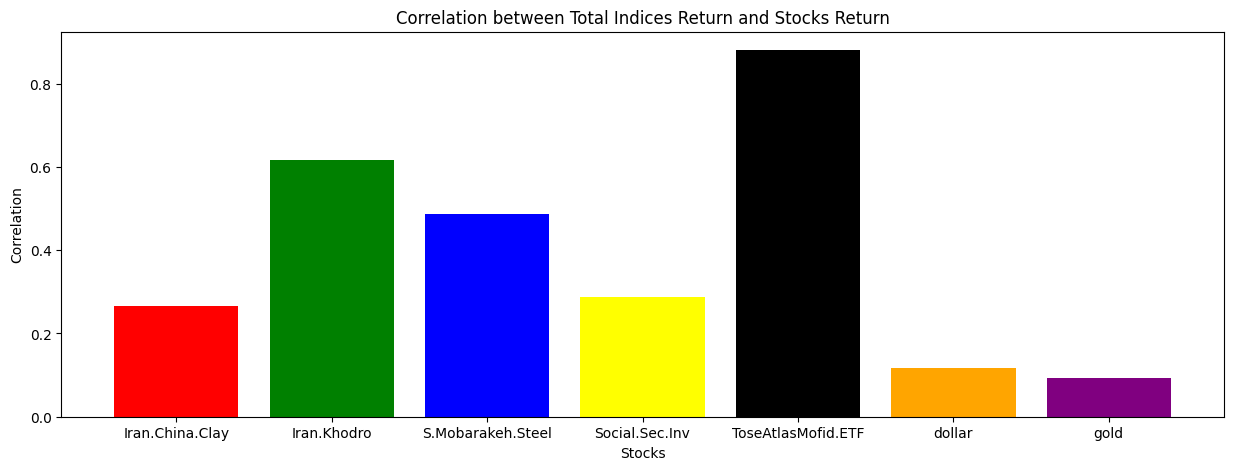

In [397]:
dataset_names = ['Iran.China.Clay','Iran.Khodro','S.Mobarakeh.Steel','Social.Sec.Inv','ToseAtlasMofid.ETF', 'dollar', 'gold']
correlation_list = correlation_for_stocks(merged_data)
print('correlation between total indices return and {} is : {}'.format(stocks[0]['<TICKER>'][0],correlation_list[0]))
print('correlation between total indices return and {} is : {}'.format(stocks[1]['<TICKER>'][0],correlation_list[1]))
print('correlation between total indices return and {} is : {}'.format(stocks[2]['<TICKER>'][0],correlation_list[2]))
print('correlation between total indices return and {} is : {}'.format(stocks[3]['<TICKER>'][0],correlation_list[3]))
print('correlation between total indices return and {} is : {}'.format(stocks[4]['<TICKER>'][0],correlation_list[4]))
print('correlation between total indices return and {} is : {}'.format('USD',correlation_list[5]))
print('correlation between total indices return and {} is : {}'.format('Gold',correlation_list[6]))

plot_correlation(correlation_list, dataset_names)


# Part 3.
# A)
Train a linear regression model that predicts the return value of the next day based on the information of how many days the return of the total index is.


Preprocessing data

becuase of the really low values in return of total indices, we need to scale the data and use log return instead of return

In [473]:
def normalize_data(data):
    data= (data - data.min()) / (data.max() - data.min())
    data = data * 2 - 1
    return data

In [474]:
total_indices['return']

0      0.000445
1      0.010958
2     -0.001628
3     -0.036181
4     -0.007365
         ...   
475    0.018976
476    0.030993
477   -0.032110
478   -0.026924
479    0.000000
Name: return, Length: 480, dtype: float64

In [475]:
toal = np.copy(total_indices['return'])
x = normalize_data(toal)
# add the normalized return to the total indices data
total_indices['normalized_return'] = x

In [479]:
# implement the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

#normalize the data norm 0 mean and 1 std

def make_window(data, window_size, num_day_prediction):
    # data = normalize_data(data)
    x = []
    y = []
    for i in range(len(data) - window_size):
        if i + window_size + num_day_prediction <= len(data):
            x.append(data[i:i + window_size])
            y.append(data[i + window_size  : i + window_size + num_day_prediction])
    x = np.array(x)
    y = np.array(y)
    return x , y

def split_data(data, test_size):
    data_lenght = len(data)
    train, test = data[0:int(data_lenght*(1-test_size))], data[int(data_lenght*(1-test_size)):]
    return train, test

# implement the linear regression model with diffrent bach size
def linear_regression(data, window_size, test_size, num_day_prediction=1):
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)
    print('\ntrain size is : {}'.format(len(train)))
    print('test size is : {}'.format(len(test))) 
    test = test.reset_index(drop=True)
    x_train,y_train, = make_window(train, window_size, num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % mse)
    print('Mean absolute error: %f' % mae)
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return model, y_pred, mse, mae


In [480]:
WINDOW_SIZE = [1, 2, 3, 4, 5, 10,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
TEST_SIZE = 0.3
MSE_results_3A = []
MAE_results_3A = []
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    model, y_pred, mse, mae = linear_regression(total_indices['return'], w, TEST_SIZE)
    MSE_results_3A.append(mse)
    MAE_results_3A.append(mae)
    





window size is : 1

train size is : 336
test size is : 144

results :
Mean squared error: 0.000130
Mean absolute error: 0.008817
----------------------------------------------------

window size is : 2

train size is : 336
test size is : 144

results :
Mean squared error: 0.000128
Mean absolute error: 0.008712
----------------------------------------------------

window size is : 3

train size is : 336
test size is : 144

results :
Mean squared error: 0.000122
Mean absolute error: 0.008419
----------------------------------------------------

window size is : 4

train size is : 336
test size is : 144

results :
Mean squared error: 0.000119
Mean absolute error: 0.008332
----------------------------------------------------

window size is : 5

train size is : 336
test size is : 144

results :
Mean squared error: 0.000120
Mean absolute error: 0.008381
----------------------------------------------------

window size is : 10

train size is : 336
test size is : 144

results :
Mean squared 

In [481]:
print('Min MSE_results happen when window size is : {}'.format(WINDOW_SIZE[MSE_results_3A.index(min(MSE_results_3A))]))
print('Min MSE_results is : {}'.format(min(MSE_results_3A)))
print('Min MAE_results happen when window size is : {}'.format(WINDOW_SIZE[MAE_results_3A.index(min(MAE_results_3A))]))
print('Min MAE_results is : {}'.format(min(MAE_results_3A)))

Min MSE_results happen when window size is : 17
Min MSE_results is : 0.00010995653350643559
Min MAE_results happen when window size is : 18
Min MAE_results is : 0.008009390380659497


In [482]:
norm_MSE_results_3A = []
norm_MAE_results_3A = []
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    norm_model, norm_y_pred, norm_mse, norm_mae = linear_regression(total_indices['normalized_return'], w, TEST_SIZE)
    norm_MSE_results_3A.append(norm_mse)
    norm_MAE_results_3A.append(norm_mae)


window size is : 1

train size is : 336
test size is : 144

results :
Mean squared error: 0.079039
Mean absolute error: 0.217248
----------------------------------------------------

window size is : 2

train size is : 336
test size is : 144

results :
Mean squared error: 0.077481
Mean absolute error: 0.214672
----------------------------------------------------

window size is : 3

train size is : 336
test size is : 144

results :
Mean squared error: 0.074270
Mean absolute error: 0.207456
----------------------------------------------------

window size is : 4

train size is : 336
test size is : 144

results :
Mean squared error: 0.072010
Mean absolute error: 0.205309
----------------------------------------------------

window size is : 5

train size is : 336
test size is : 144

results :
Mean squared error: 0.072636
Mean absolute error: 0.206512
----------------------------------------------------

window size is : 10

train size is : 336
test size is : 144

results :
Mean squared 

In [484]:
print('results for normalized data :')
print('Min MSE_results happen when window size is : {}'.format(WINDOW_SIZE[norm_MSE_results_3A.index(min(norm_MSE_results_3A))]))
print('Min MSE_results is : {}'.format(min(norm_MSE_results_3A)))
print('Min MAE_results happen when window size is : {}'.format(WINDOW_SIZE[norm_MAE_results_3A.index(min(norm_MAE_results_3A))]))
print('Min MAE_results is : {}'.format(min(norm_MAE_results_3A)))

results for normalized data :
Min MSE_results happen when window size is : 17
Min MSE_results is : 0.0667584639322744
Min MAE_results happen when window size is : 18
Min MAE_results is : 0.19735226248588267


# B)
Train a statistical classifier model that only predicts the trend of changes in the total index (that is, the positive or negative return of the index). Check the accuracy of the model in predicting one, two, three and four days later.


In [551]:
#import the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

def logistic_regression(data, window_size, test_size, num_day_prediction):
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)

    x_train,y_train, = make_window(train, window_size,  num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)
    
    y_train_binary = np.where(y_train[:,0] > 0, 1, 0)
    y_test_binary = np.where(y_test[:,0] > 0, 1, 0)

    #reshape binary data to 1D
    model = LogisticRegression()
    model.fit(x_train, y_train_binary)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test_binary, y_pred)
    mae = mean_absolute_error(y_test_binary, y_pred)
    acu = accuracy_score(y_test_binary, y_pred)
    confusion_mat = confusion_matrix(y_test_binary, y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % mse)
    print('Mean absolute error: %f' % mae)
    print('Coefficient of determination: %f' % r2_score(y_test_binary, y_pred))
    print('acurracy score: %f' % acu)
    print('confusion matrix: \n{}'.format(confusion_mat))
    
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return model, y_pred, mse, mae, acu, confusion_mat

In [552]:
WINDOW_SIZE = [1, 2, 3, 4, 5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,96,97,98,99,100,101,102,103,104,105,110]
TEST_SIZE = 0.3
NUM_DAY_PREDICTION = [1,2,3,4]

Classifier_MSE_results_1 = []
Classifier_MAE_results_1 = []
Classifier_SCORE_results_1 = []
classifier_conf_1 =[]
print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    model_1, y_pred_1, mse_1, mae_1, score_1, conf_1 = logistic_regression(total_indices['return'], w, TEST_SIZE, 1)
    Classifier_MSE_results_1.append(mse_1)
    Classifier_MAE_results_1.append(mae_1)
    Classifier_SCORE_results_1.append(score_1)
    classifier_conf_1.append(conf_1)




predict the next day return

window size is : 1

results :
Mean squared error: 0.510490
Mean absolute error: 0.510490
Coefficient of determination: -1.042857
acurracy score: 0.489510
confusion matrix: 
[[70  0]
 [73  0]]
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.507042
Mean absolute error: 0.507042
Coefficient of determination: -1.028571
acurracy score: 0.492958
confusion matrix: 
[[70  0]
 [72  0]]
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.510638
Mean absolute error: 0.510638
Coefficient of determination: -1.043478
acurracy score: 0.489362
confusion matrix: 
[[69  0]
 [72  0]]
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.485714
Mean absolute error: 0.485714
Coefficient of determination: -0.944444
acurracy score: 0.514286
confusion matrix: 
[[65  3]
 [65  7]]
-----------------------------------------

Min Classifier_MSE_results happen when window size is : 102
Min Classifier_MSE_results is : 0.2619047619047619
Min Classifier_MAE_results happen when window size is : 102
Min Classifier_MAE_results is : 0.2619047619047619
Max Classifier_SCORE_results happen when window size is : 102
Max Classifier_SCORE_results is : 0.7380952380952381
confusion matrix for the best model is : 
[[23  4]
 [ 7  8]]


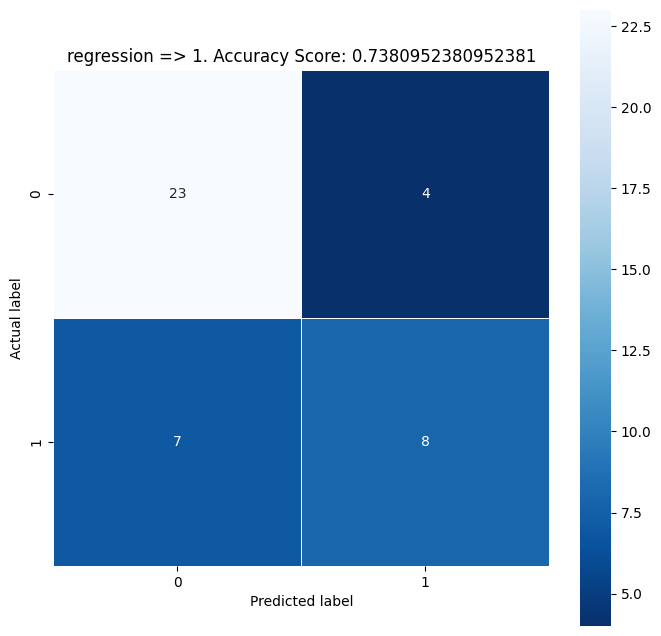

In [550]:
print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MSE_results_1.index(min(Classifier_MSE_results_1))]))
print('Min Classifier_MSE_results is : {}'.format(min(Classifier_MSE_results_1)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MAE_results_1.index(min(Classifier_MAE_results_1))]))
print('Min Classifier_MAE_results is : {}'.format(min(Classifier_MAE_results_1)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_SCORE_results_1.index(max(Classifier_SCORE_results_1))]))
print('Max Classifier_SCORE_results is : {}'.format(max(Classifier_SCORE_results_1)))
print ('confusion matrix for the best model is : \n{}'.format(classifier_conf_1[Classifier_SCORE_results_1.index(max(Classifier_SCORE_results_1))]))

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(classifier_conf_1[Classifier_SCORE_results_1.index(max(Classifier_SCORE_results_1))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'regression => 1. Accuracy Score: {0}'.format(max(Classifier_SCORE_results_1))
plt.title(all_sample_title, size = 12);


In [516]:
Classifier_MSE_results_2 = []
Classifier_MAE_results_2 = []
Classifier_SCORE_results_2 = []
classifier_conf_2 =[]

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    model_2, y_pred_2, mse_2, mae_2, score_2, conf_2 = logistic_regression(total_indices['return'], w, TEST_SIZE, 2)
    Classifier_MSE_results_2.append(mse_2)
    Classifier_MAE_results_2.append(mae_2)
    Classifier_SCORE_results_2.append(score_2)
    classifier_conf_2.append(conf_2)

predict the next day return

window size is : 1

results :
Mean squared error: 0.514085
Mean absolute error: 0.514085
Coefficient of determination: -1.057971
acurracy score: 0.485915
confusion matrix: 
[[68  1]
 [72  1]]
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.510638
Mean absolute error: 0.510638
Coefficient of determination: -1.043478
acurracy score: 0.489362
confusion matrix: 
[[69  0]
 [72  0]]
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.500000
Mean absolute error: 0.500000
Coefficient of determination: -1.001634
acurracy score: 0.500000
confusion matrix: 
[[67  1]
 [69  3]]
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.374101
Mean absolute error: 0.374101
Coefficient of determination: -0.498342
acurracy score: 0.625899
confusion matrix: 
[[60  7]
 [45 27]]
-----------------------------------------

Min Classifier_MSE_results happen when window size is : 101
Min Classifier_MSE_results is : 0.2619047619047619
Min Classifier_MAE_results happen when window size is : 101
Min Classifier_MAE_results is : 0.2619047619047619
Max Classifier_SCORE_results happen when window size is : 101
Max Classifier_SCORE_results is : 0.7380952380952381
confusion matrix for the best model is : 
[[23  4]
 [ 7  8]]


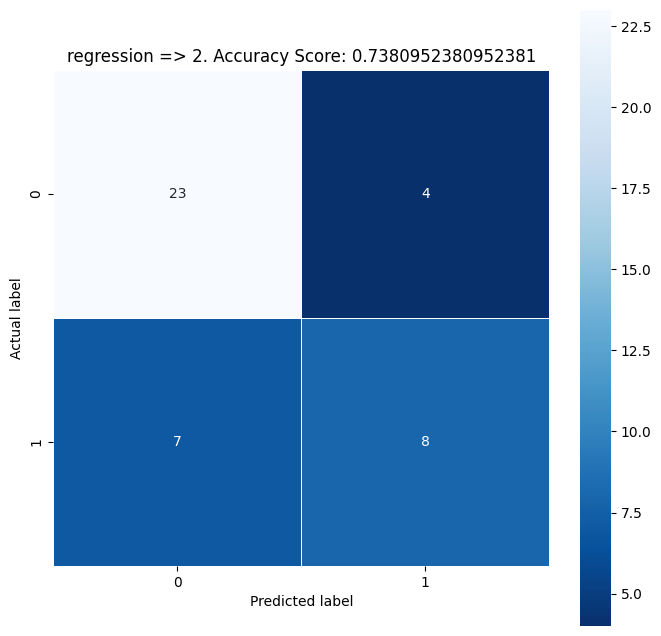

In [517]:
print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MSE_results_2.index(min(Classifier_MSE_results_2))]))
print('Min Classifier_MSE_results is : {}'.format(min(Classifier_MSE_results_2)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MAE_results_2.index(min(Classifier_MAE_results_2))]))
print('Min Classifier_MAE_results is : {}'.format(min(Classifier_MAE_results_2)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_SCORE_results_2.index(max(Classifier_SCORE_results_2))]))
print('Max Classifier_SCORE_results is : {}'.format(max(Classifier_SCORE_results_2)))
print ('confusion matrix for the best model is : \n{}'.format(classifier_conf_2[Classifier_SCORE_results_2.index(max(Classifier_SCORE_results_2))]))

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(classifier_conf_2[Classifier_SCORE_results_2.index(max(Classifier_SCORE_results_2))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'regression => 2. Accuracy Score: {0}'.format(max(Classifier_SCORE_results_2))
plt.title(all_sample_title, size = 12);

In [519]:
Classifier_MSE_results_3 = []
Classifier_MAE_results_3 = []
Classifier_SCORE_results_3 = []
classifier_conf_3 =[]

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    model_3, y_pred_3, mse_3, mae_3, score_3, conf_3 = logistic_regression(total_indices['return'], w, TEST_SIZE,3)
    Classifier_MSE_results_3.append(mse_3)
    Classifier_MAE_results_3.append(mae_3)
    Classifier_SCORE_results_3.append(score_3)
    classifier_conf_3.append(conf_3)

predict the next day return

window size is : 1

results :
Mean squared error: 0.418440
Mean absolute error: 0.418440
Coefficient of determination: -0.675866
acurracy score: 0.581560
confusion matrix: 
[[64  4]
 [55 18]]
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.514286
Mean absolute error: 0.514286
Coefficient of determination: -1.058824
acurracy score: 0.485714
confusion matrix: 
[[67  1]
 [71  1]]
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.395683
Mean absolute error: 0.395683
Coefficient of determination: -0.584784
acurracy score: 0.604317
confusion matrix: 
[[63  4]
 [51 21]]
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.340580
Mean absolute error: 0.340580
Coefficient of determination: -0.364899
acurracy score: 0.659420
confusion matrix: 
[[43 23]
 [24 48]]
-----------------------------------------

Min Classifier_MSE_results happen when window size is : 101
Min Classifier_MSE_results is : 0.24390243902439024
Min Classifier_MAE_results happen when window size is : 101
Min Classifier_MAE_results is : 0.24390243902439024
Max Classifier_SCORE_results happen when window size is : 101
Max Classifier_SCORE_results is : 0.7560975609756098
confusion matrix for the best model is : 
[[17  9]
 [ 1 14]]


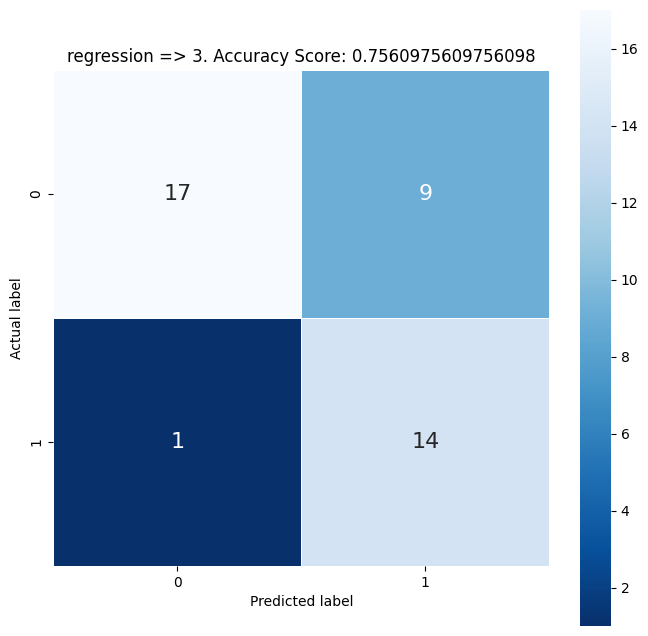

In [535]:
print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MSE_results_3.index(min(Classifier_MSE_results_3))]))
print('Min Classifier_MSE_results is : {}'.format(min(Classifier_MSE_results_3)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MAE_results_3.index(min(Classifier_MAE_results_3))]))
print('Min Classifier_MAE_results is : {}'.format(min(Classifier_MAE_results_3)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_SCORE_results_3.index(max(Classifier_SCORE_results_3))]))
print('Max Classifier_SCORE_results is : {}'.format(max(Classifier_SCORE_results_3)))
print ('confusion matrix for the best model is : \n{}'.format(classifier_conf_3[Classifier_SCORE_results_3.index(max(Classifier_SCORE_results_3))]))

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(classifier_conf_3[Classifier_SCORE_results_3.index(max(Classifier_SCORE_results_3))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'regression => 3. Accuracy Score: {0}'.format(max(Classifier_SCORE_results_3))
plt.title(all_sample_title, size = 12);

In [523]:
Classifier_MSE_results_4 = []
Classifier_MAE_results_4 = []
Classifier_SCORE_results_4 = []
classifier_conf_4 =[]

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    model_4, y_pred_4, mse_4, mae_4, score_4, conf_4 = logistic_regression(total_indices['return'], w, TEST_SIZE, 4)
    Classifier_MSE_results_4.append(mse_4)
    Classifier_MAE_results_4.append(mae_4)
    Classifier_SCORE_results_4.append(score_4)
    classifier_conf_4.append(conf_4)

predict the next day return

window size is : 1

results :
Mean squared error: 0.507143
Mean absolute error: 0.507143
Coefficient of determination: -1.032304
acurracy score: 0.492857
confusion matrix: 
[[67  0]
 [71  2]]
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.517986
Mean absolute error: 0.517986
Coefficient of determination: -1.074627
acurracy score: 0.482014
confusion matrix: 
[[67  0]
 [72  0]]
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.500000
Mean absolute error: 0.500000
Coefficient of determination: -1.003788
acurracy score: 0.500000
confusion matrix: 
[[66  0]
 [69  3]]
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.364964
Mean absolute error: 0.364964
Coefficient of determination: -0.463675
acurracy score: 0.635036
confusion matrix: 
[[59  6]
 [44 28]]
-----------------------------------------

Min Classifier_MSE_results happen when window size is : 101
Min Classifier_MSE_results is : 0.225
Min Classifier_MAE_results happen when window size is : 101
Min Classifier_MAE_results is : 0.225
Max Classifier_SCORE_results happen when window size is : 101
Max Classifier_SCORE_results is : 0.775
confusion matrix for the best model is : 
[[23  2]
 [ 7  8]]


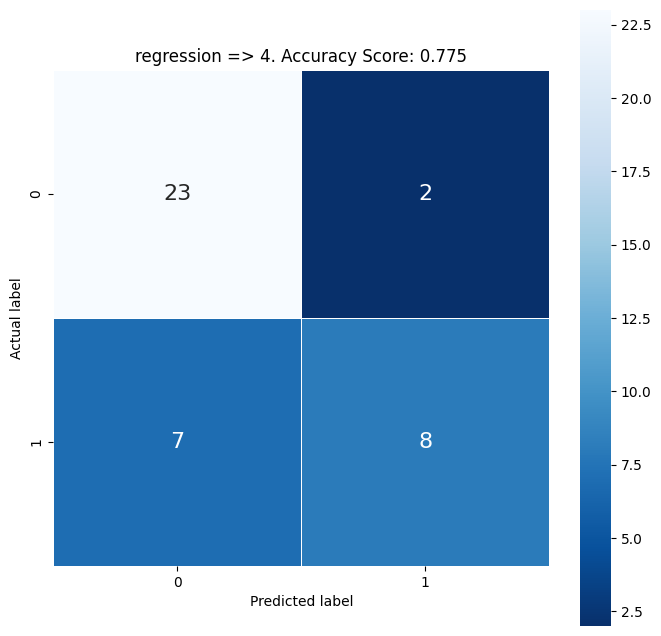

In [536]:
print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MSE_results_4.index(min(Classifier_MSE_results_4))]))
print('Min Classifier_MSE_results is : {}'.format(min(Classifier_MSE_results_4)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_MAE_results_4.index(min(Classifier_MAE_results_4))]))
print('Min Classifier_MAE_results is : {}'.format(min(Classifier_MAE_results_4)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[Classifier_SCORE_results_4.index(max(Classifier_SCORE_results_4))]))
print('Max Classifier_SCORE_results is : {}'.format(max(Classifier_SCORE_results_4)))
print ('confusion matrix for the best model is : \n{}'.format(classifier_conf_4[Classifier_SCORE_results_4.index(max(Classifier_SCORE_results_4))]))

#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(classifier_conf_4[Classifier_SCORE_results_4.index(max(Classifier_SCORE_results_4))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'regression => 4. Accuracy Score: {0}'.format(max(Classifier_SCORE_results_4))
plt.title(all_sample_title, size = 12);


Implementing the Gradient Boosting Classifier

In [526]:
#implementing the gradient boosting classifier
#import gradian booting tree
from sklearn.ensemble import GradientBoostingClassifier

def gradient_boosting_classifier(data, window_size, test_size, num_day_prediction,n_estimators=100, learning_rate=0.1):
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)

    x_train,y_train, = make_window(train, window_size,  num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)

    y_train_binary = np.where(y_train[:,0] > 0, 1, 0)
    y_test_binary = np.where(y_test[:,0] > 0, 1, 0)

    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,).fit(x_train, y_train_binary)
    model.fit(x_train, y_train_binary)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test_binary, y_pred)
    mae = mean_absolute_error(y_test_binary, y_pred)
    acc = accuracy_score(y_test_binary, y_pred)
    conf = confusion_matrix(y_test_binary, y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % mse)
    print('Mean absolute error: %f' % mae)
    print('Coefficient of determination: %f' % r2_score(y_test_binary, y_pred))
    print('model score: %f' % acc)
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return model, y_pred, mse, mae, acc, conf




In [527]:
GBT_MSE_results_1 = []
GBT_MAE_results_1 = []
GBT_SCORE_results_1 = []
GBT_Confusion_1 = []
print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    GBT_model_1, GBT_y_pred_1, GBT_mse_1, GBT_mae_1, GBT_score_1, GBT_conf_1 = gradient_boosting_classifier(total_indices['return'], w, TEST_SIZE, 1,100,0.1)
    GBT_MSE_results_1.append(GBT_mse_1)
    GBT_MAE_results_1.append(GBT_mae_1)
    GBT_SCORE_results_1.append(GBT_score_1)
    GBT_Confusion_1.append(GBT_conf_1)

predict the next day return

window size is : 1

results :
Mean squared error: 0.405594
Mean absolute error: 0.405594
Coefficient of determination: -0.623092
model score: 0.594406
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.450704
Mean absolute error: 0.450704
Coefficient of determination: -0.803175
model score: 0.549296
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.404255
Mean absolute error: 0.404255
Coefficient of determination: -0.617754
model score: 0.595745
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.342857
Mean absolute error: 0.342857
Coefficient of determination: -0.372549
model score: 0.657143
----------------------------------------------------

window size is : 5

results :
Mean squared error: 0.381295
Mean absolute error: 0.381295
Coefficient of determination: -0.525891
model score: 0.618705


Min Classifier_MSE_results happen when window size is : 97
Min Classifier_MSE_results is : 0.23404255319148937
Min Classifier_MAE_results happen when window size is : 97
Min Classifier_MAE_results is : 0.23404255319148937
Max Classifier_SCORE_results happen when window size is : 97
Max Classifier_SCORE_results is : 0.7659574468085106
confusion matrix for the best model is : 
[[25  6]
 [ 5 11]]


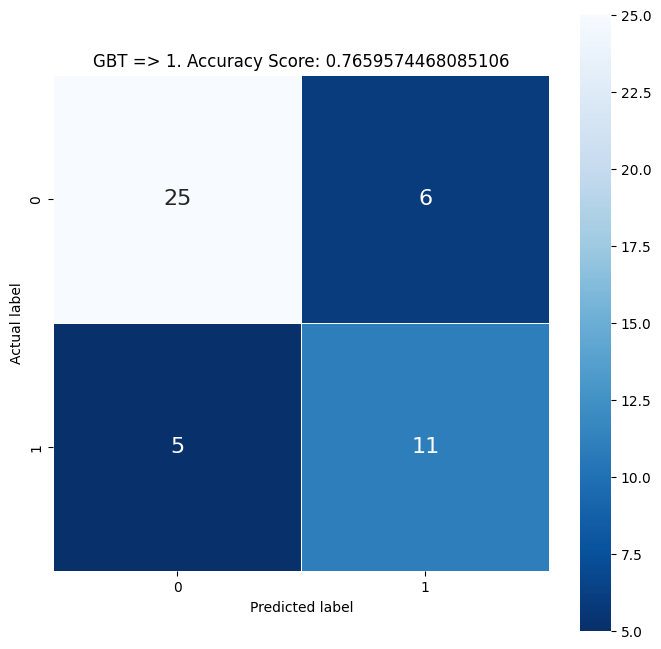

In [537]:

print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MSE_results_1.index(min(GBT_MSE_results_1))]))
print('Min Classifier_MSE_results is : {}'.format(min(GBT_MSE_results_1)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MAE_results_1.index(min(GBT_MAE_results_1))]))
print('Min Classifier_MAE_results is : {}'.format(min(GBT_MAE_results_1)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_SCORE_results_1.index(max(GBT_SCORE_results_1))]))
print('Max Classifier_SCORE_results is : {}'.format(max(GBT_SCORE_results_1)))
print ('confusion matrix for the best model is : \n{}'.format(GBT_Confusion_1[GBT_SCORE_results_1.index(max(GBT_SCORE_results_1))]))

#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(GBT_Confusion_1[GBT_SCORE_results_1.index(max(GBT_SCORE_results_1))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'GBT => 1. Accuracy Score: {0}'.format(max(GBT_SCORE_results_1))
plt.title(all_sample_title, size = 12);




In [540]:
GBT_MSE_results_2 = []
GBT_MAE_results_2 = []
GBT_SCORE_results_2 = []
GBT_Confusion_2 = []

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    GBT_model_2, GBT_y_pred_2, GBT_mse_2, GBT_mae_2, GBT_score_2, GBT_conf_2 = gradient_boosting_classifier(total_indices['return'], w, TEST_SIZE, 2,100,0.1)
    GBT_MSE_results_2.append(GBT_mse_2)
    GBT_MAE_results_2.append(GBT_mae_2)
    GBT_SCORE_results_2.append(GBT_score_2)
    GBT_Confusion_2.append(GBT_conf_2)

predict the next day return

window size is : 1

results :
Mean squared error: 0.394366
Mean absolute error: 0.394366
Coefficient of determination: -0.578717
model score: 0.605634
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.439716
Mean absolute error: 0.439716
Coefficient of determination: -0.759662
model score: 0.560284
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.450000
Mean absolute error: 0.450000
Coefficient of determination: -0.801471
model score: 0.550000
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.366906
Mean absolute error: 0.366906
Coefficient of determination: -0.469527
model score: 0.633094
----------------------------------------------------

window size is : 5

results :
Mean squared error: 0.420290
Mean absolute error: 0.420290
Coefficient of determination: -0.682573
model score: 0.579710


Min Classifier_MSE_results happen when window size is : 96
Min Classifier_MSE_results is : 0.19148936170212766
Min Classifier_MAE_results happen when window size is : 96
Min Classifier_MAE_results is : 0.19148936170212766
Max Classifier_SCORE_results happen when window size is : 96
Max Classifier_SCORE_results is : 0.8085106382978723
confusion matrix for the best model is : 
[[26  5]
 [ 4 12]]


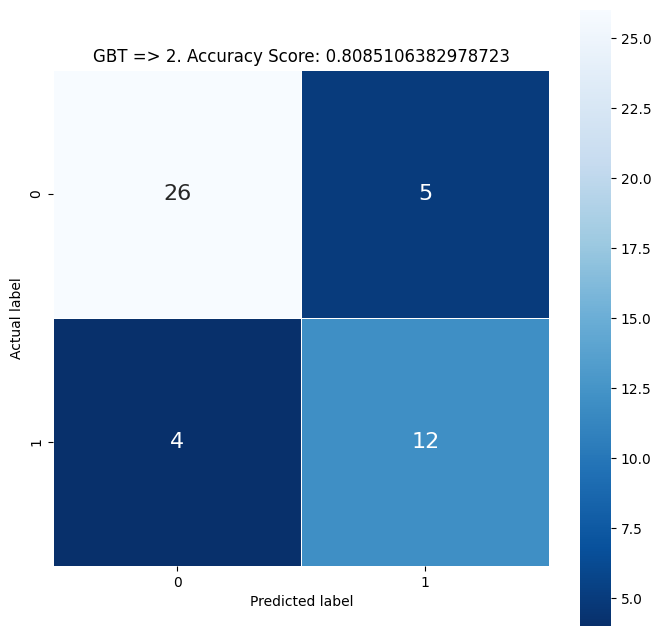

In [541]:

print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MSE_results_2.index(min(GBT_MSE_results_2))]))
print('Min Classifier_MSE_results is : {}'.format(min(GBT_MSE_results_2)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MAE_results_2.index(min(GBT_MAE_results_2))]))
print('Min Classifier_MAE_results is : {}'.format(min(GBT_MAE_results_2)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_SCORE_results_2.index(max(GBT_SCORE_results_2))]))
print('Max Classifier_SCORE_results is : {}'.format(max(GBT_SCORE_results_2)))
print ('confusion matrix for the best model is : \n{}'.format(GBT_Confusion_2[GBT_SCORE_results_2.index(max(GBT_SCORE_results_2))]))

#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(GBT_Confusion_2[GBT_SCORE_results_2.index(max(GBT_SCORE_results_2))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'GBT => 2. Accuracy Score: {0}'.format(max(GBT_SCORE_results_2))
plt.title(all_sample_title, size = 12);




In [530]:
GBT_MSE_results_3 = []
GBT_MAE_results_3 = []
GBT_SCORE_results_3 = []
GBT_Confusion_3 = []

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    GBT_model_3, GBT_y_pred_3, GBT_mse_3, GBT_mae_3, GBT_score_3, GBT_conf_3 = gradient_boosting_classifier(total_indices['return'], w, TEST_SIZE, 3,100,0.1)
    GBT_MSE_results_3.append(GBT_mse_3)
    GBT_MAE_results_3.append(GBT_mae_3)
    GBT_SCORE_results_3.append(GBT_score_3)
    GBT_Confusion_3.append(GBT_conf_3)

predict the next day return

window size is : 1

results :
Mean squared error: 0.368794
Mean absolute error: 0.368794
Coefficient of determination: -0.477035
model score: 0.631206
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.450000
Mean absolute error: 0.450000
Coefficient of determination: -0.801471
model score: 0.550000
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.417266
Mean absolute error: 0.417266
Coefficient of determination: -0.671227
model score: 0.582734
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.384058
Mean absolute error: 0.384058
Coefficient of determination: -0.539141
model score: 0.615942
----------------------------------------------------

window size is : 5

results :
Mean squared error: 0.394161
Mean absolute error: 0.394161
Coefficient of determination: -0.578745
model score: 0.605839


Min Classifier_MSE_results happen when window size is : 97
Min Classifier_MSE_results is : 0.2
Min Classifier_MAE_results happen when window size is : 97
Min Classifier_MAE_results is : 0.2
Max Classifier_SCORE_results happen when window size is : 97
Max Classifier_SCORE_results is : 0.8
confusion matrix for the best model is : 
[[26  3]
 [ 6 10]]


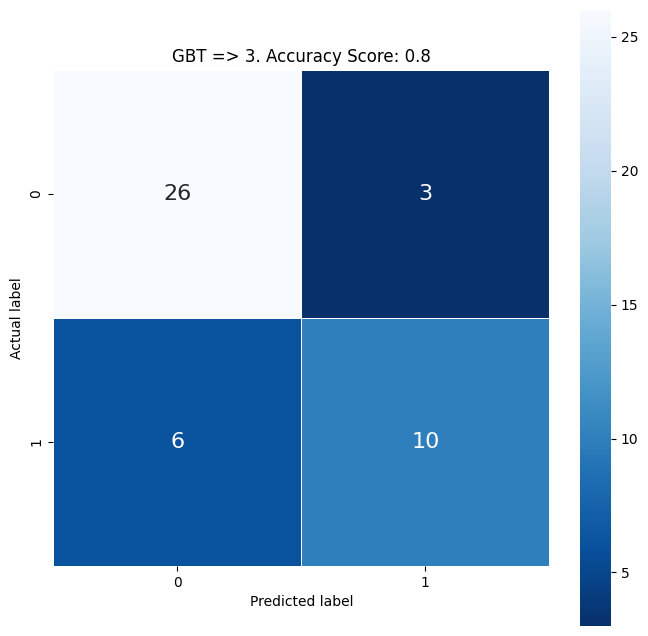

In [538]:

print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MSE_results_3.index(min(GBT_MSE_results_3))]))
print('Min Classifier_MSE_results is : {}'.format(min(GBT_MSE_results_3)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MAE_results_3.index(min(GBT_MAE_results_3))]))
print('Min Classifier_MAE_results is : {}'.format(min(GBT_MAE_results_3)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_SCORE_results_3.index(max(GBT_SCORE_results_3))]))
print('Max Classifier_SCORE_results is : {}'.format(max(GBT_SCORE_results_3)))
print ('confusion matrix for the best model is : \n{}'.format(GBT_Confusion_3[GBT_SCORE_results_3.index(max(GBT_SCORE_results_3))]))

#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(GBT_Confusion_3[GBT_SCORE_results_3.index(max(GBT_SCORE_results_3))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'GBT => 3. Accuracy Score: {0}'.format(max(GBT_SCORE_results_3))
plt.title(all_sample_title, size = 12);



In [532]:
GBT_MSE_results_4 = []
GBT_MAE_results_4 = []
GBT_SCORE_results_4 = []
GBT_Confusion_4 = []

print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    GBT_model_4, GBT_y_pred_4, GBT_mse_4, GBT_mae_4, GBT_score_4, GBT_conf_4 = gradient_boosting_classifier(total_indices['return'], w, TEST_SIZE,4,100,0.1)
    GBT_MSE_results_4.append(GBT_mse_4)
    GBT_MAE_results_4.append(GBT_mae_4)
    GBT_SCORE_results_4.append(GBT_score_4)
    GBT_Confusion_4.append(GBT_conf_4)

predict the next day return

window size is : 1

results :
Mean squared error: 0.371429
Mean absolute error: 0.371429
Coefficient of determination: -0.488448
model score: 0.628571
----------------------------------------------------

window size is : 2

results :
Mean squared error: 0.460432
Mean absolute error: 0.460432
Coefficient of determination: -0.844113
model score: 0.539568
----------------------------------------------------

window size is : 3

results :
Mean squared error: 0.442029
Mean absolute error: 0.442029
Coefficient of determination: -0.771465
model score: 0.557971
----------------------------------------------------

window size is : 4

results :
Mean squared error: 0.372263
Mean absolute error: 0.372263
Coefficient of determination: -0.492949
model score: 0.627737
----------------------------------------------------

window size is : 5

results :
Mean squared error: 0.389706
Mean absolute error: 0.389706
Coefficient of determination: -0.561863
model score: 0.610294


Min Classifier_MSE_results happen when window size is : 96
Min Classifier_MSE_results is : 0.15555555555555556
Min Classifier_MAE_results happen when window size is : 96
Min Classifier_MAE_results is : 0.15555555555555556
Max Classifier_SCORE_results happen when window size is : 96
Max Classifier_SCORE_results is : 0.8444444444444444
confusion matrix for the best model is : 
[[25  4]
 [ 3 13]]


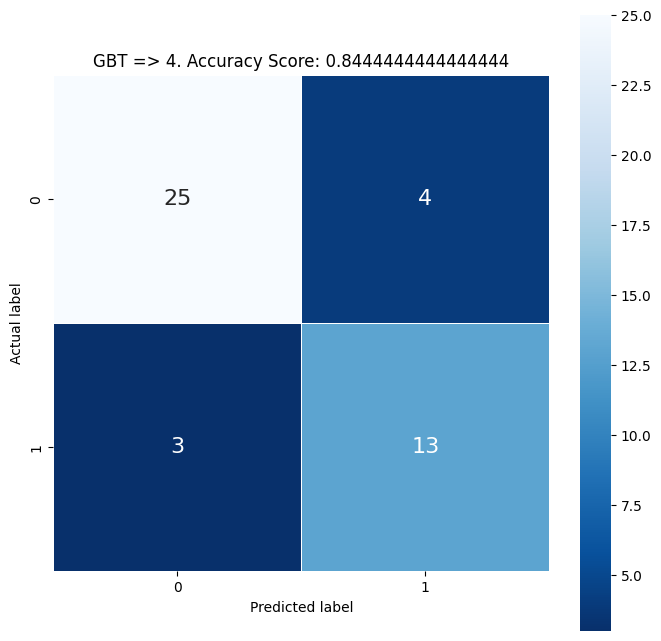

In [539]:

print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MSE_results_4.index(min(GBT_MSE_results_4))]))
print('Min Classifier_MSE_results is : {}'.format(min(GBT_MSE_results_4)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_MAE_results_4.index(min(GBT_MAE_results_4))]))
print('Min Classifier_MAE_results is : {}'.format(min(GBT_MAE_results_4)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[GBT_SCORE_results_4.index(max(GBT_SCORE_results_4))]))
print('Max Classifier_SCORE_results is : {}'.format(max(GBT_SCORE_results_4)))
print ('confusion matrix for the best model is : \n{}'.format(GBT_Confusion_4[GBT_SCORE_results_4.index(max(GBT_SCORE_results_4))]))

#plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(GBT_Confusion_4[GBT_SCORE_results_4.index(max(GBT_SCORE_results_4))], annot=True, linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 16});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'GBT => 4. Accuracy Score: {0}'.format(max(GBT_SCORE_results_4))
plt.title(all_sample_title, size = 12);



# C)
Train a hybrid model that predicts the return value of the total index and whether it is positive or negative using the previous values ​​of the total index return and the stocks in question.

In [556]:
#define a dataset with return values and their names
combined_data = pd.DataFrame({'date':total_indices['<DTYYYYMMDD>'],'iran_china_clay':iran_china_clay['return'],
                            'iran_khodro': iran_khodro['return'] , 's_mobarakeh_steel': s_mobarakeh_steel['return'],
                            'social_sec_inv': social_sec_inv['return'], 'tose_atlas_mofid': tose_atlas_mofid['return'],
                            'total_indices' : total_indices['return'] , 'P_or_N': np.where(total_indices['return'] > 0, 1, 0)})

combined_data = combined_data[0:479]
combined_data

date  iran_china_clay  iran_khodro  s_mobarakeh_steel  \
0    20230201        -0.001497    -0.001365           0.000000   
1    20230131        -0.002240     0.033134           0.020443   
2    20230130        -0.014717    -0.004911           0.000000   
3    20230129        -0.048985    -0.046488          -0.034539   
4    20230128        -0.039005    -0.013527           0.000000   
..        ...              ...          ...                ...   
474  20210209        -0.002257     0.023346           0.049029   
475  20210208        -0.012483     0.044715           0.049515   
476  20210207        -0.016012    -0.042802          -0.044527   
477  20210206        -0.007619    -0.030189          -0.040071   
478  20210203         0.000000     0.000000           0.000000   

     social_sec_inv  tose_atlas_mofid  total_indices  P_or_N  
0         -0.006309         -0.005092       0.000445       1  
1          0.007415          0.022111       0.010958       1  
2          0.007471          0.003001      -0.001628       0  
3         -0.046796         -0.029973      -0.036181       0  
4         -0.008073         -0.006776      -0.007365       0  
..              ...               ...            ...     ...  
474        0.030065         -0.003525       0.018170       1  
475        0.040924          0.064443       0.018976       1  
476       -0.048557         -0.041440       0.030993       1  
477       -0.040018         -0.010228      -0.032110       0  
478        0.000000          0.000000      -0.026924       0  

[479 rows x 8 columns]

In [557]:
combined_data.isnull().sum()

date                 0
iran_china_clay      0
iran_khodro          0
s_mobarakeh_steel    0
social_sec_inv       0
tose_atlas_mofid     0
total_indices        0
P_or_N               0
dtype: int64

In [568]:
#show 6 first columns
combined_data.iloc[:,6:8]

total_indices  P_or_N
0         0.000445       1
1         0.010958       1
2        -0.001628       0
3        -0.036181       0
4        -0.007365       0
..             ...     ...
474       0.018170       1
475       0.018976       1
476       0.030993       1
477      -0.032110       0
478      -0.026924       0

[479 rows x 2 columns]

In [562]:
# implement multisock prediction
def multi_stock_prediction(data, window_size, test_size, num_day_prediction):
    
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)
    # print(train.iloc[: , 0:7])
    print('\ntrain size is : {}'.format(len(train)))
    print('test size is : {}'.format(len(test))) 
    x_train,y_train, = make_window(train, window_size, num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)

    x_train = x_train[:, 0, 1:7]
    y_train = y_train[:, 0, 6:7]

    x_test = x_test[:, 0, 1:7]
    y_test = y_test[:, 0, 6:7]

    # print(x_test)
    # print(x_test.shape)
    # print(y_train)

    multi_model = LinearRegression()
    multi_model.fit(x_train, y_train)
    multi_y_pred = multi_model.predict(x_test)
    multi_mse = mean_squared_error(y_test, multi_y_pred)
    multi_mae = mean_absolute_error(y_test, multi_y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % multi_mse)
    print('Mean absolute error: %f' % multi_mae)
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return multi_model, multi_y_pred, multi_mse, multi_mae




In [563]:
WINDOW_SIZE = [1, 2, 3, 4, 5, 10,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
TEST_SIZE = 0.3
multi_MSE_results = []
multi_MAE_results = []
multi_SCORE_results = []
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    multi_model, multi_y_pred, multi_mse, multi_mae= multi_stock_prediction(combined_data, w, TEST_SIZE,1)
    multi_MSE_results.append(multi_mse)
    multi_MAE_results.append(multi_mae)
    


window size is : 1

train size is : 335
test size is : 144

results :
Mean squared error: 0.000055
Mean absolute error: 0.005687
----------------------------------------------------

window size is : 2

train size is : 335
test size is : 144

results :
Mean squared error: 0.000153
Mean absolute error: 0.009465
----------------------------------------------------

window size is : 3

train size is : 335
test size is : 144

results :
Mean squared error: 0.000140
Mean absolute error: 0.009161
----------------------------------------------------

window size is : 4

train size is : 335
test size is : 144

results :
Mean squared error: 0.000151
Mean absolute error: 0.009442
----------------------------------------------------

window size is : 5

train size is : 335
test size is : 144

results :
Mean squared error: 0.000145
Mean absolute error: 0.009356
----------------------------------------------------

window size is : 10

train size is : 335
test size is : 144

results :
Mean squared 

In [564]:
print('Min multi_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[multi_MSE_results.index(min(multi_MSE_results))]))
print('Min multi_MSE_results is : {}'.format(min(multi_MSE_results)))
print('Min multi_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[multi_MAE_results.index(min(multi_MAE_results))]))
print('Min multi_MAE_results is : {}'.format(min(multi_MAE_results)))


Min multi_MSE_results happen when window size is : 1
Min multi_MSE_results is : 5.549998442633453e-05
Min multi_MAE_results happen when window size is : 1
Min multi_MAE_results is : 0.005686531082135615


In [574]:
noramalized_combined_data = combined_data.copy()
for i in range(1, 7):
    noramalized_combined_data.iloc[:,i] = normalize_data(noramalized_combined_data.iloc[:,i])
# copy combined data to temp

noramalized_combined_data

date  iran_china_clay  iran_khodro  s_mobarakeh_steel  \
0    20230201         0.823403    -0.255454           0.765107   
1    20230131         0.820841     0.278640           0.835695   
2    20230130         0.777854    -0.310350           0.765107   
3    20230129         0.659781    -0.954047           0.645844   
4    20230128         0.694170    -0.443746           0.765107   
..        ...              ...          ...                ...   
474  20210209         0.820783     0.127116           0.934399   
475  20210208         0.785549     0.457948           0.936077   
476  20210207         0.773390    -0.896969           0.611358   
477  20210206         0.802311    -0.701700           0.626743   
478  20210203         0.828561    -0.234326           0.765107   

     social_sec_inv  tose_atlas_mofid  total_indices  P_or_N  
0          0.864868         -0.130765      -0.097535       1  
1          0.892970          0.311597       0.161523       1  
2          0.893083          0.000846      -0.148611       0  
3          0.781970         -0.535364      -1.000000       0  
4          0.861257         -0.158150      -0.289968       0  
..              ...               ...            ...     ...  
474        0.939345         -0.105278       0.339212       1  
475        0.961581          1.000000       0.359069       1  
476        0.778364         -0.721848       0.655172       1  
477        0.795849         -0.214280      -0.899681       0  
478        0.877786         -0.047959      -0.771910       0  

[479 rows x 8 columns]

In [575]:
WINDOW_SIZE = [1, 2, 3, 4, 5, 10,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
TEST_SIZE = 0.3
norm_multi_MSE_results = []
norm_multi_MAE_results = []
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    norm_multi_model, norm_multi_y_pred, norm_multi_mse, norm_multi_mae= multi_stock_prediction(noramalized_combined_data, w, TEST_SIZE,1)
    norm_multi_MSE_results.append(norm_multi_mse)
    norm_multi_MAE_results.append(norm_multi_mae)
    


window size is : 1

train size is : 335
test size is : 144

results :
Mean squared error: 0.033696
Mean absolute error: 0.140117
----------------------------------------------------

window size is : 2

train size is : 335
test size is : 144

results :
Mean squared error: 0.092837
Mean absolute error: 0.233225
----------------------------------------------------

window size is : 3

train size is : 335
test size is : 144

results :
Mean squared error: 0.084928
Mean absolute error: 0.225717
----------------------------------------------------

window size is : 4

train size is : 335
test size is : 144

results :
Mean squared error: 0.091911
Mean absolute error: 0.232643
----------------------------------------------------

window size is : 5

train size is : 335
test size is : 144

results :
Mean squared error: 0.087866
Mean absolute error: 0.230526
----------------------------------------------------

window size is : 10

train size is : 335
test size is : 144

results :
Mean squared 

In [576]:
print('Min multi_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[norm_multi_MSE_results.index(min(norm_multi_MSE_results))]))
print('Min multi_MSE_results is : {}'.format(min(norm_multi_MSE_results)))
print('Min multi_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[norm_multi_MAE_results.index(min(norm_multi_MAE_results))]))
print('Min multi_MAE_results is : {}'.format(min(norm_multi_MAE_results)))


Min multi_MSE_results happen when window size is : 1
Min multi_MSE_results is : 0.033695985044402944
Min multi_MAE_results happen when window size is : 1
Min multi_MAE_results is : 0.140116753138377


In [596]:
# implement multisock prediction
def multi_stock_classification(data, window_size, test_size, num_day_prediction,n_estimators=100, learning_rate=0.1):
    
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)
    # print(train.iloc[: , 0:7])
    print('\ntrain size is : {}'.format(len(train)))
    print('test size is : {}'.format(len(test))) 
    x_train,y_train, = make_window(train, window_size, num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)

    x_train = x_train[:, 0, 1:7]
    y_train = y_train[:, 0, 7:8]
    y_train =y_train.ravel()

    x_test = x_test[:, 0, 1:7]
    y_test = y_test[:, 0, 7:8]
    y_test =y_test.ravel()

    multi_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,)
    multi_model.fit(x_train, y_train)
    multi_y_pred = multi_model.predict(x_test)
    multi_mse = mean_squared_error(y_test, multi_y_pred)
    multi_mae = mean_absolute_error(y_test, multi_y_pred)
    multi_acc = accuracy_score(y_test, multi_y_pred)
    multi_conf_mat = confusion_matrix(y_test, multi_y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % multi_mse)
    print('Mean absolute error: %f' % multi_mae)
    print('model score: %f' % multi_acc)
    print('confusion matrix: \n', multi_conf_mat)
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return multi_model, multi_y_pred, multi_mse, multi_mae, multi_acc, multi_conf_mat




In [597]:
multi_GBT_MSE_results_1 = []
multi_GBT_MAE_results_1 = []
multi_GBT_SCORE_results_1 = []
multi_GBT_CONF_MAT_results_1 = []
print('predict the next day return')
for w in WINDOW_SIZE:
    print('\nwindow size is : {}'.format(w))
    multi_GBT_model_1, multi_GBT_y_pred_1, multi_GBT_mse_1, multi_GBT_mae_1, multi_GBT_score_1, multi_GBT_conf_1 = multi_stock_classification(combined_data, w, TEST_SIZE, 1,100,0.1)
    multi_GBT_MSE_results_1.append(multi_GBT_mse_1)
    multi_GBT_MAE_results_1.append(multi_GBT_mae_1)
    multi_GBT_SCORE_results_1.append(multi_GBT_score_1)
    multi_GBT_CONF_MAT_results_1.append(multi_GBT_conf_1)

predict the next day return

window size is : 1

train size is : 335
test size is : 144

results :
Mean squared error: 0.174825
Mean absolute error: 0.174825
model score: 0.825175
confusion matrix: 
 [[51 19]
 [ 6 67]]
----------------------------------------------------

window size is : 2

train size is : 335
test size is : 144

results :
Mean squared error: 0.535211
Mean absolute error: 0.535211
model score: 0.464789
confusion matrix: 
 [[19 50]
 [26 47]]
----------------------------------------------------

window size is : 3

train size is : 335
test size is : 144

results :
Mean squared error: 0.496454
Mean absolute error: 0.496454
model score: 0.503546
confusion matrix: 
 [[30 39]
 [31 41]]
----------------------------------------------------

window size is : 4

train size is : 335
test size is : 144

results :
Mean squared error: 0.442857
Mean absolute error: 0.442857
model score: 0.557143
confusion matrix: 
 [[32 36]
 [26 46]]
-------------------------------------------------

Min Classifier_MSE_results happen when window size is : 1
Min Classifier_MSE_results is : 0.17482517482517482
Min Classifier_MAE_results happen when window size is : 1
Min Classifier_MAE_results is : 0.17482517482517482
Max Classifier_SCORE_results happen when window size is : 1
Max Classifier_SCORE_results is : 0.8251748251748252
Max Classifier_CONF_MAT_results happen when window size is : 
[[51 19]
 [ 6 67]]


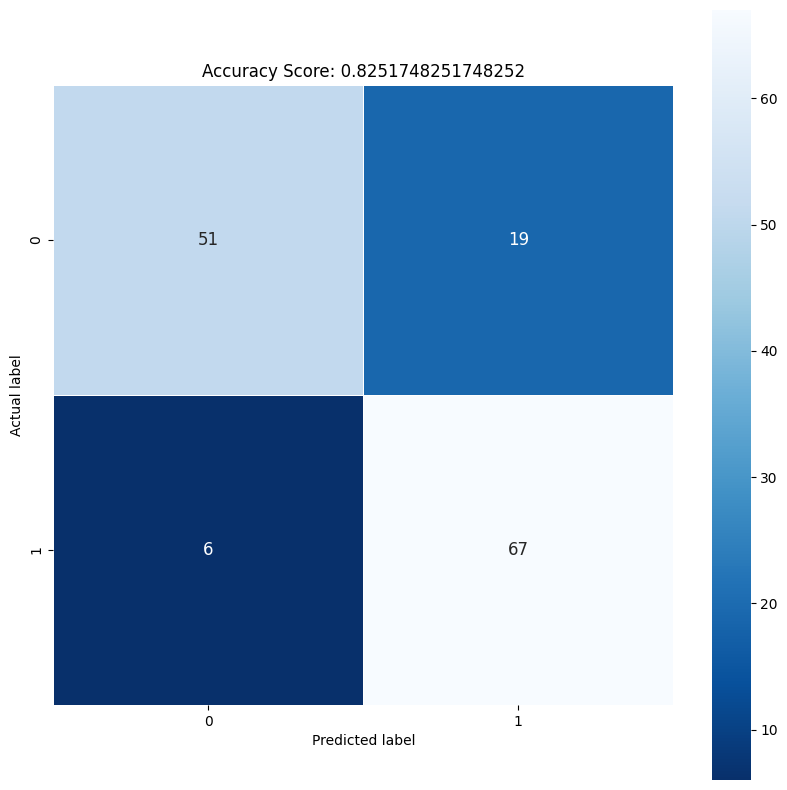

In [598]:
print('Min Classifier_MSE_results happen when window size is : {}'.format(WINDOW_SIZE[multi_GBT_MSE_results_1.index(min(multi_GBT_MSE_results_1))]))
print('Min Classifier_MSE_results is : {}'.format(min(multi_GBT_MSE_results_1)))
print('Min Classifier_MAE_results happen when window size is : {}'.format(WINDOW_SIZE[multi_GBT_MAE_results_1.index(min(multi_GBT_MAE_results_1))]))
print('Min Classifier_MAE_results is : {}'.format(min(multi_GBT_MAE_results_1)))
print('Max Classifier_SCORE_results happen when window size is : {}'.format(WINDOW_SIZE[multi_GBT_SCORE_results_1.index(max(multi_GBT_SCORE_results_1))]))
print('Max Classifier_SCORE_results is : {}'.format(max(multi_GBT_SCORE_results_1)))
print('Max Classifier_CONF_MAT_results happen when window size is : \n{}'.format(multi_GBT_CONF_MAT_results_1[multi_GBT_SCORE_results_1.index(max(multi_GBT_SCORE_results_1))]))
#plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(multi_GBT_CONF_MAT_results_1[multi_GBT_SCORE_results_1.index(max(multi_GBT_SCORE_results_1))] , annot=True, linewidths=.5, square = True, cmap = 'Blues_r',annot_kws={"size": 12});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(multi_GBT_SCORE_results_1[0])
plt.title(all_sample_title, size = 12);

# D)
Use the Lasso regression model to predict the total index return using the data of the previous ten days of the total index return. Check the ability of this model to select the desired features

In [609]:
#import lasse regression
from sklearn.linear_model import Lasso

def lasso_regression(data, window_size, test_size, num_day_prediction=1, alph=0.1):
    #split the data into train and test
    train, test = split_data(data, test_size)
    test = test.reset_index(drop=True)
    
    x_train,y_train, = make_window(train, window_size,  num_day_prediction)
    x_test, y_test = make_window(test, window_size, num_day_prediction)
    #use lasso regression to predict the target
    model = Lasso(alpha=alph)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #calculate the mse, mae and score
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('\nresults :')
    print('Mean squared error: %f' % mse)
    print('Mean absolute error: %f' % mae)
    print('Coefficient of determination: %f' % r2_score(y_test, y_pred))
    print('model coef:\n', model.coef_)
    # print('model coef: %f' % model.coef_)
    print('----------------------------------------------------')
    return model, y_pred, mse, mae, model.coef_

In [611]:
WINDOW_SIZE=10
TEST_SIZE=0.3
NUM_DAY_PREDICTION=1
alph =[0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
mse_results = []
mae_results = []
coef_result = []
for a in alph:
    print('\nalpha is : {}'.format(a))
    model, y_pred, mse, mae, coef = lasso_regression(total_indices['return'], WINDOW_SIZE, TEST_SIZE, NUM_DAY_PREDICTION, a)
    mse_results.append(mse)
    mae_results.append(mae)
    coef_result.append(coef)


alpha is : 0.1

results :
Mean squared error: 0.000149
Mean absolute error: 0.009454
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.05

results :
Mean squared error: 0.000149
Mean absolute error: 0.009454
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.01

results :
Mean squared error: 0.000149
Mean absolute error: 0.009454
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.005

results :
Mean squared error: 0.000149
Mean absolute error: 0.009454
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.001

results :
Mean squared error: 0.000149
Me

In [613]:
print('Min MSE_results happen when alpha is : {}'.format(alph[mse_results.index(min(mse_results))]))
print('Min MSE_results is : {}'.format(min(mse_results)))
print('Min MAE_results happen when alpha is : {}'.format(alph[mae_results.index(min(mae_results))]))
print('Min MAE_results is : {}'.format(min(mae_results)))
print('best coef is : \n{}'.format(coef_result[mse_results.index(min(mse_results))]))

Min MSE_results happen when alpha is : 1e-05
Min MSE_results is : 0.0001313468336577589
Min MAE_results happen when alpha is : 1e-05
Min MAE_results is : 0.008795771308151413
best coef is : 
[ 0.          0.         -0.02861085 -0.         -0.         -0.
 -0.          0.06028942 -0.          0.17206386]


In [614]:
WINDOW_SIZE=10
TEST_SIZE=0.3
NUM_DAY_PREDICTION=1
alph =[0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
norm_mse_results = []
norm_mae_results = []
norm_coef_result = []
for a in alph:
    print('\nalpha is : {}'.format(a))
    norm_model, norm_y_pred, norm_mse, norm_mae, norm_coef = lasso_regression(total_indices['normalized_return'], WINDOW_SIZE, TEST_SIZE, NUM_DAY_PREDICTION, a)
    norm_mse_results.append(norm_mse)
    norm_mae_results.append(norm_mae)
    norm_coef_result.append(norm_coef)


alpha is : 0.1

results :
Mean squared error: 0.090207
Mean absolute error: 0.232953
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.05

results :
Mean squared error: 0.090207
Mean absolute error: 0.232953
Coefficient of determination: -0.012573
model coef:
 [ 0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
----------------------------------------------------

alpha is : 0.01

results :
Mean squared error: 0.082644
Mean absolute error: 0.221562
Coefficient of determination: 0.072320
model coef:
 [ 0.          0.         -0.         -0.         -0.         -0.
 -0.          0.00755454 -0.          0.1207366 ]
----------------------------------------------------

alpha is : 0.005

results :
Mean squared error: 0.079058
Mean absolute error: 0.215774
Coefficient of determination: 0.112572
model coef:
 [ 0.          0.00686156 -0.04371591 -0.         -0.         -0.
 -0.          0.074

In [615]:
print('Min MSE_results happen when alpha is : {}'.format(alph[norm_mse_results.index(min(norm_mse_results))]))
print('Min MSE_results is : {}'.format(min(norm_mse_results)))
print('Min MAE_results happen when alpha is : {}'.format(alph[norm_mae_results.index(min(norm_mae_results))]))
print('Min MAE_results is : {}'.format(min(norm_mae_results)))
print('best coef is : \n{}'.format(norm_coef_result[norm_mse_results.index(min(norm_mse_results))]))

Min MSE_results happen when alpha is : 1e-05
Min MSE_results is : 0.07256000254345552
Min MAE_results happen when alpha is : 1e-05
Min MAE_results is : 0.20737903808542096
best coef is : 
[-0.01092747  0.11250129 -0.12441043 -0.00919772 -0.05049381 -0.00134642
 -0.06270402  0.19167007 -0.11296993  0.29644328]
